<a href="https://colab.research.google.com/github/shashankm10/turbo-dollop/blob/main/Appliance_Energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appliance Energy Prediction**
In this century, the world is being driven towards more cleaner means of energy. The electricity generated using the renewable sources plays a major role. But simply generating and utilizing the electrical energy is not viable, any extra generation will lead to non utilization and less generation will lead to power outages. Hence, we need demand side and supply side management so we can flatten the generation distribution curve. The residential load contributes to 27% of the total energy consuption (**Source:**:Eurostat). Residential household consumption is generally  governed by weather conditions. Here we have a data of one of e residential building in belgium and using machine learning techniques we have to figure out which algorithm gives the best output.

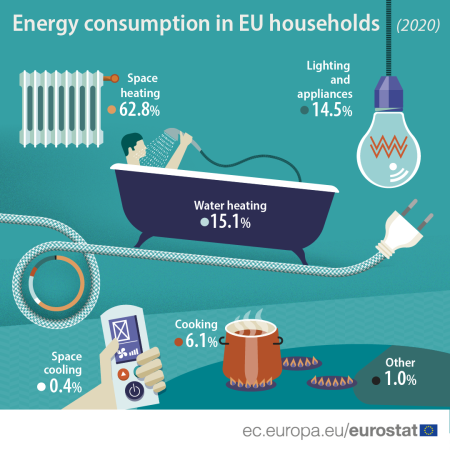
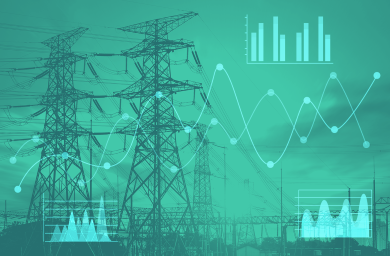

## **Dataset Description**
The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

##**Attribute Information**:

####**Date**, time year-month-day hour:minute:second
####**Appliances**, energy use in Wh
####**lights**, energy use of light fixtures in the house in Wh
####**T1**, Temperature in kitchen area, in Celsius
####**RH_1**, Humidity in kitchen area, in %

####**T2**, Temperature in living room area, in Celsius

####**RH_2**, Humidity in living room area, in

####**T3**, Temperature in laundry room area

####**RH_3**, Humidity in laundry room area, in %

####**T4**, Temperature in office room, in Celsius

####**RH_4**, Humidity in office room, in %

####**T5**, Temperature in bathroom, in Celsius

####**RH_5**, Humidity in bathroom, in %

####**T6**, Temperature outside the building (north side), in Celsius

####**RH_6**, Humidity outside the building (north side), in %

####**T7**, Temperature in ironing room , in Celsius

####**RH_7**, Humidity in ironing room, in %

####**T8**, Temperature in teenager room 2, in Celsius

####**RH_8**, Humidity in teenager room 2, in %

####**T9**, Temperature in parents room, in Celsius

####**RH_9**, Humidity in parents room, in %

####**To**, Temperature outside (from Chievres weather station), in Celsius

####**Pressure** (from Chievres weather station), in mm Hg

####**RH_out**, Humidity outside (from Chievres weather station), in %

####**Wind speed** (from Chievres weather station), in m/s

####**Visibility** (from Chievres weather station), in km

####**Tdewpoint** (from Chievres weather station), Â °C

####**rv1**, Random variable 1, nondimensional

####**rv2**, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

#Roadmap:-
* Understanding the terms in the problem
* Loading the data into the dataframe
* Cleaning the data
* Extracting the statistics from the data
* EDA(Exploratory data analysis)
* Feature Selection
* Pre-processing data
* Model-Fit
* Conclusion


# Process Outline

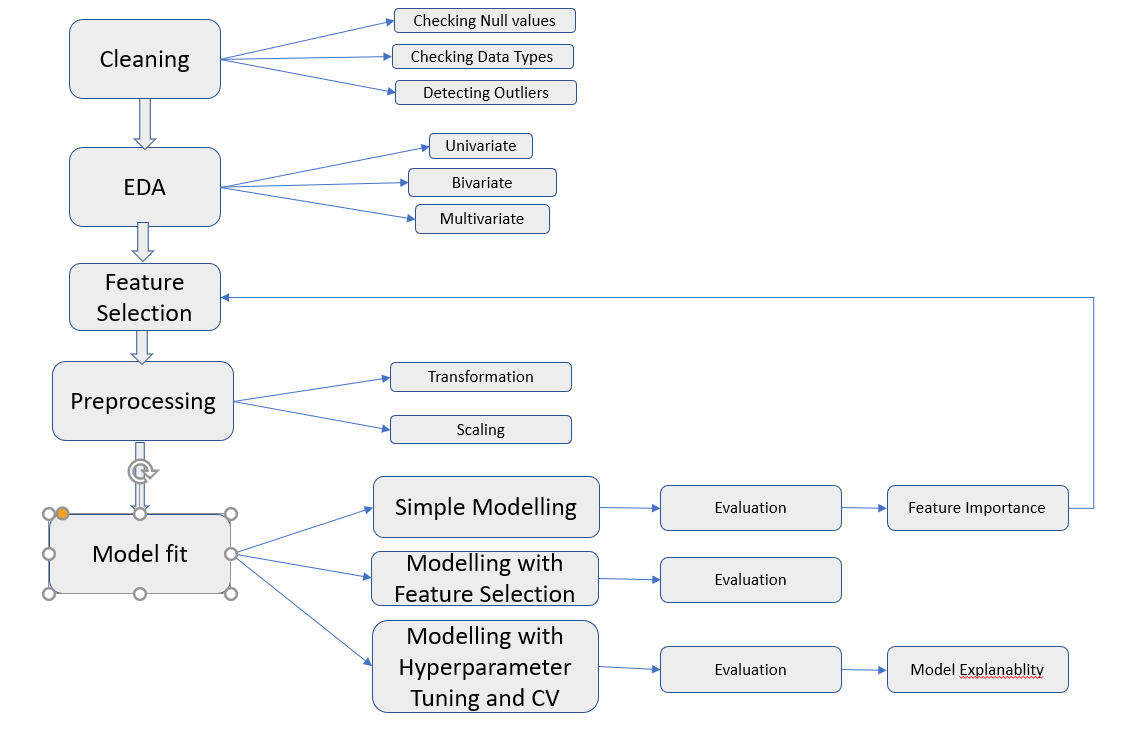

## **Loading Dataset and Importing Modules**

In [ ]:
#we need Shap for explaining our machine learning model hence we will install Shap and import the shap library
!pip install Shap

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from datetime import datetime
import datetime as dt
from numpy import math

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.tree import export_graphviz
import shap


import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## **Mount the drive and import the datset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Capstone Project/Appliance Energy Prediction/data_application_energy.csv')

## **Data Understanding**
We need to look the data first in order to process the data

In [ ]:
#checking the head of the data
df.head(10)

date  Appliances  lights         T1       RH_1     T2  \
0  2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
1  2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2  2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
3  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
4  2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
5  2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
6  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
7  2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
8  2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
9  2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

        RH_2     T3       RH_3         T4  ...         T9   RH_9     T_out  \
0  44.790000  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000   
1  44.722500  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333   
2  44.626667  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667   
3  44.590000  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000   
4  44.530000  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333   
5  44.500000  19.79  44.933333  18.890000  ...  17.000000  45.29  6.016667   
6  44.500000  19.79  44.900000  18.890000  ...  17.000000  45.29  5.900000   
7  44.500000  19.73  44.900000  18.890000  ...  17.000000  45.29  5.916667   
8  44.433333  19.73  44.790000  18.890000  ...  17.000000  45.29  5.933333   
9  44.400000  19.79  44.863333  18.890000  ...  17.000000  45.29  5.950000   

   Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0   733.500000  92.000000   7.000000   63.000000   5.300000  13.275433   
1   733.600000  92.000000   6.666667   59.166667   5.200000  18.606195   
2   733.700000  92.000000   6.333333   55.333333   5.100000  28.642668   
3   733.800000  92.000000   6.000000   51.500000   5.000000  45.410389   
4   733.900000  92.000000   5.666667   47.666667   4.900000  10.084097   
5   734.000000  92.000000   5.333333   43.833333   4.800000  44.919484   
6   734.100000  92.000000   5.000000   40.000000   4.700000  47.233763   
7   734.166667  91.833333   5.166667   40.000000   4.683333  33.039890   
8   734.233333  91.666667   5.333333   40.000000   4.666667  31.455702   
9   734.300000  91.500000   5.500000   40.000000   4.650000   3.089314   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097  
5  44.919484  
6  47.233763  
7  33.039890  
8  31.455702  
9   3.089314  

[10 rows x 29 columns]

In [ ]:
#checking the tail of the data
df.tail(5)

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [ ]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(19735, 29)


In our dataset 29 columns and 19735 rows are present

In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#check details about the data set
#df.info() gives the summary of the dataframe including data types, shape and memory storage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
#print the unique value
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
#to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.
df.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

### from the statistics part of our data we can observe

*   Max energy usage of appliance is 1080 and min is 10 watt
*   light column having majority of the data 0 values
*   Max pressure outside house is 772.3 mm_hg
*   Except date column There is none catergorical column in the dataset.
*   Average temperature outside is about 7.5 degrees. While it ranges from   -6 to 28 degress.

*   There is no null or missing values.
*   Average humidity outside is higher than average humidity inside.
*   Max wind speed is 14 m/s

# **Exploratory Data Analysis**

## Extract Days,Month and Year from date columns.

---



In [ ]:

df1=df.copy()
df1['Date'] = pd.to_datetime(df1['date'])
df1.drop('date',inplace=True,axis=1)
df2=df1.groupby(df1.Date.dt.strftime('%Y-%m-%d')).sum()
df2


Appliances  lights           T1         RH_1           T2  \
Date                                                                    
2016-01-11        5740    1260   873.960000  1970.060833   846.440000   
2016-01-12       12340     610  2893.295000  6500.450000  2780.302252   
2016-01-13       13970     780  2764.486667  6172.959167  2673.865809   
2016-01-14       21800     720  2933.579167  6110.667500  2843.010833   
2016-01-15       18050     860  3208.456667  5630.298333  3100.056764   
...                ...     ...          ...          ...          ...   
2016-05-23       11960     290  3520.086667  6771.644167  3286.940833   
2016-05-24       13850     610  3499.105000  6064.205000  3256.990833   
2016-05-25       12080     370  3441.506764  5605.893366  3296.832933   
2016-05-26       21170     450  3463.959069  6108.121634  3536.285534   
2016-05-27       14860      70  2665.740000  5036.672500  2651.177500   

                   RH_2           T3         RH_3           T4         RH_4  \
Date                                                                          
2016-01-11  1881.313333   845.920833  1931.682500   818.673333  1984.954167   
2016-01-12  6304.281622  2879.085000  6470.376667  2847.280000  6416.185000   
2016-01-13  6065.232351  2823.726667  6295.808333  2737.411667  6093.385000   
2016-01-14  5860.680833  3000.611667  6249.562500  2691.975000  6225.271667   
2016-01-15  5499.921234  3018.106667  5963.023333  2824.578333  6042.389167   
...                 ...          ...          ...          ...          ...   
2016-05-23  6875.951667  3715.426667  6188.750833  3422.297500  6524.821667   
2016-05-24  6145.586667  3653.127500  5755.364167  3437.145667  5983.519119   
2016-05-25  5498.230703  3605.519340  5491.856913  3437.894264  5555.866251   
2016-05-26  5592.458499  3748.907684  5583.646991  3483.097403  5864.883582   
2016-05-27  4732.810857  2952.559167  4448.473333  2673.926667  4764.145000   

            ...           T9         RH_9    T_out  Press_mm_hg   RH_out  \
Date        ...                                                            
2016-01-11  ...   710.563333  1894.460833   248.75     30877.30   3750.0   
2016-01-12  ...  2452.730000  6577.938333   801.55    106938.45  12600.0   
2016-01-13  ...  2441.315000  6435.572500   699.40    108689.85  12010.5   
2016-01-14  ...  2431.413333  6541.665000   494.20    107966.50  12444.5   
2016-01-15  ...  2497.780000  6412.943333   383.80    108659.50  12727.5   
...         ...          ...          ...      ...          ...      ...   
2016-05-23  ...  3325.858500  6680.801147  1810.15    108842.35  12128.5   
2016-05-24  ...  3278.168333  6054.185500  1665.90    109297.05  11042.0   
2016-05-25  ...  3189.286476  5714.199405  1665.15    108991.80  10767.5   
2016-05-26  ...  3231.230000  6249.681102  2149.00    108953.25  10704.5   
2016-05-27  ...  2496.784167  5039.322881  1874.30     82380.55   8096.0   

            Windspeed  Visibility  Tdewpoint          rv1          rv2  
Date                                                                    
2016-01-11      255.5      1715.5     177.60  1102.449602  1102.449602  
2016-01-12      833.0      5361.0     517.90  3672.730349  3672.730349  
2016-01-13      808.5      4544.5     312.45  3378.920507  3378.920507  
2016-01-14      904.0      5061.5     189.60  3638.097980  3638.097980  
2016-01-15     1119.0      5790.0     122.35  3785.690222  3785.690222  
...               ...         ...        ...          ...          ...  
2016-05-23      606.0      6626.5    1418.65  3544.090936  3544.090936  
2016-05-24      592.5      4892.5    1075.55  3671.234291  3671.234291  
2016-05-25      194.5      4426.5     981.95  3978.747141  3978.747141  
2016-05-26      266.5      5663.5    1387.65  3252.985829  3252.985829  
2016-05-27      222.5      5079.0    1334.85  2761.237869  2761.237869  

[138 rows x 28 columns]

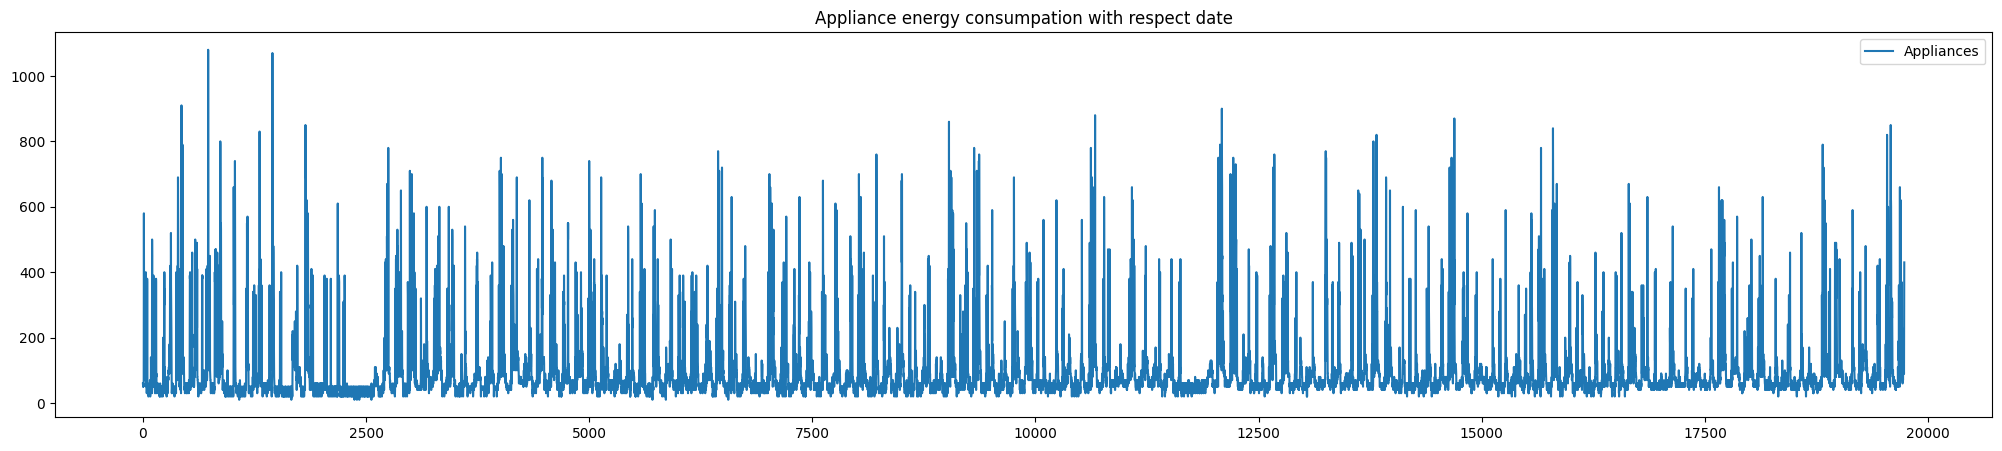

In [ ]:
#ploting graph between appliance and dates
plt.figure(figsize=(25,5))
sns.lineplot(df1[['Date','Appliances']])
plt.title("Appliance energy consumpation with respect date")
plt.show()

In [ ]:
#extracting date month time from date time columns
df["Date"]=df["date"].astype("datetime64")
df['months']=df["Date"].dt.month
df['hour']=df["Date"].dt.hour


<Axes: xlabel='months'>

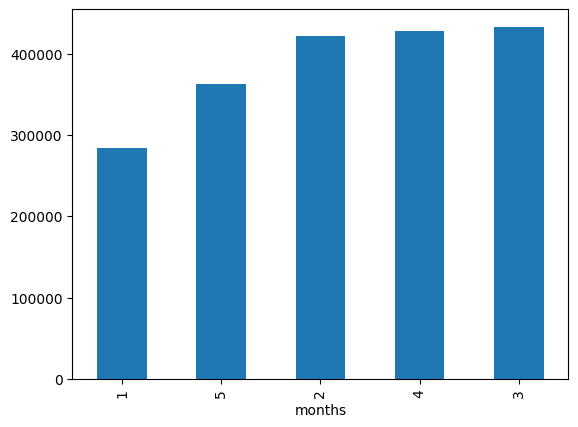

In [ ]:
#monthwise consumptoions
month=df.groupby(df.months)["Appliances"].sum().sort_values(ascending=True)
month.plot(kind='bar')

It is clearly understood that march has the maximum energy consumption

<Axes: xlabel='hour'>

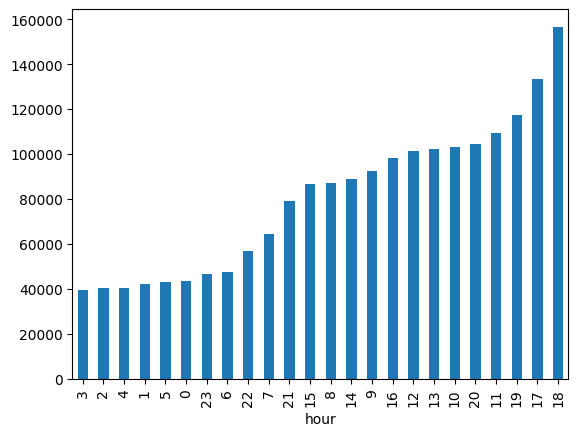

In [ ]:
hours=df.groupby(df.hour)["Appliances"].sum().sort_values(ascending=True)
hours.plot(kind='bar')

The maximum power consumption is around evening while the least compumstion is around the early morning hours

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(-2500.0, 0, '−2500'),
  Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

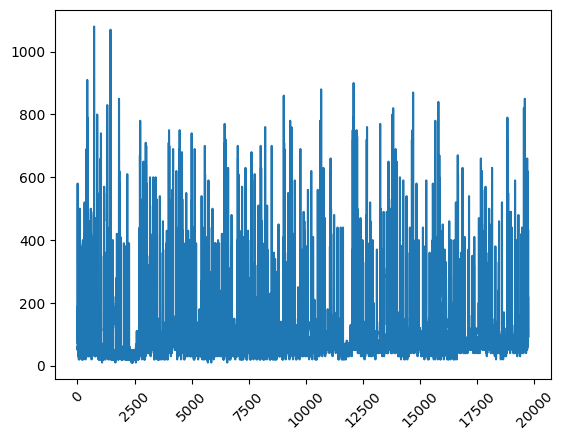

In [ ]:
df.Appliances.plot()
plt.xticks(rotation = 45)

### **Daywise Temperature over 4.5 months**

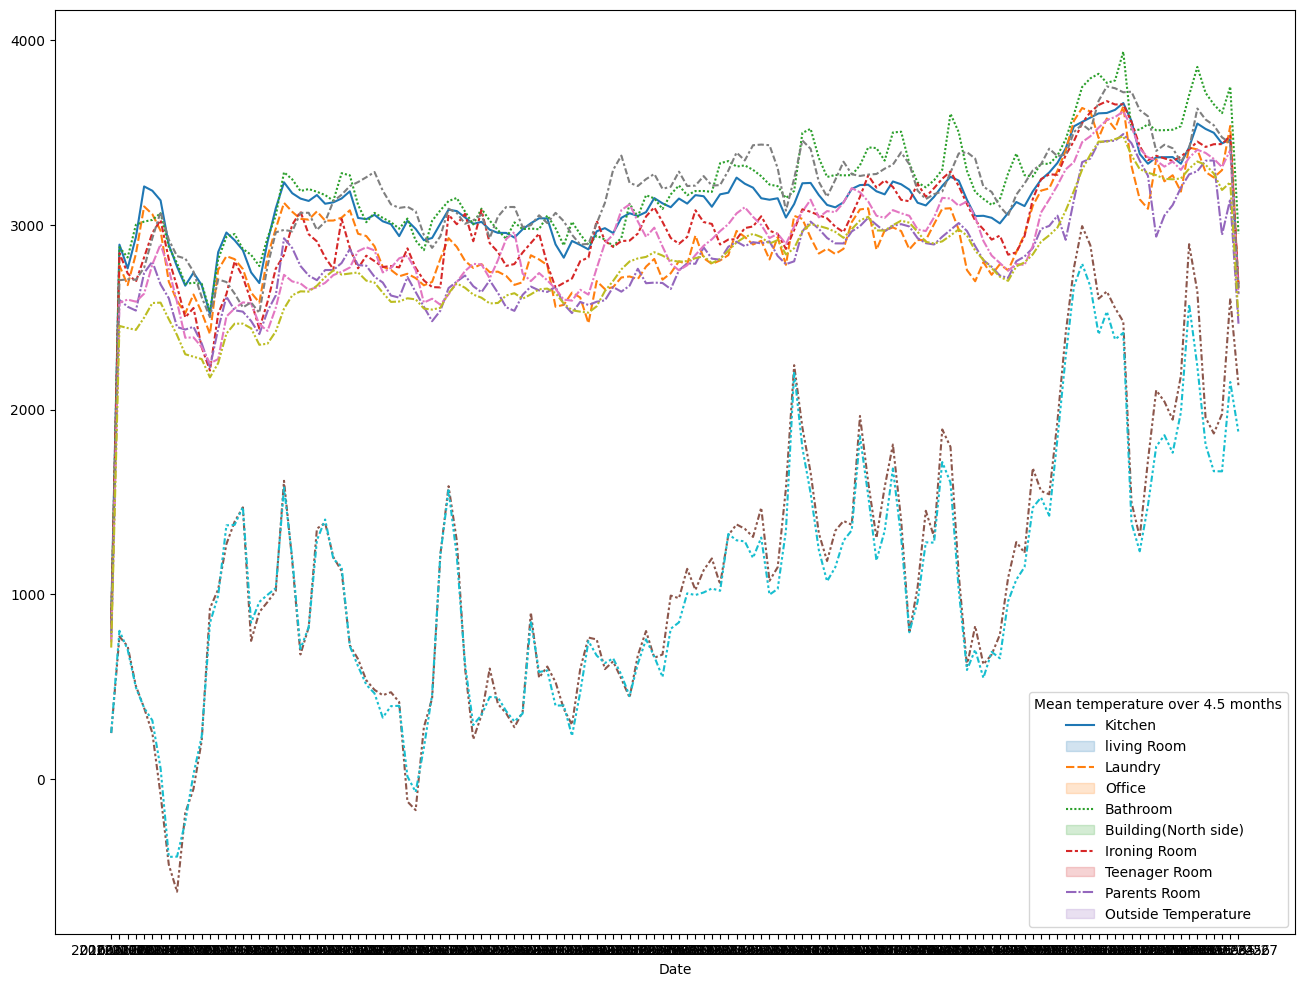

In [ ]:
plt.figure(figsize=(16,12))

sns.lineplot(
    data=df2[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']]
      #,height=10, aspect=1.5,


)

plt.legend(title="Mean temperature over 4.5 months",
           labels=['Kitchen','living Room','Laundry','Office','Bathroom','Building(North side)','Ironing Room','Teenager Room','Parents Room','Outside Temperature'])


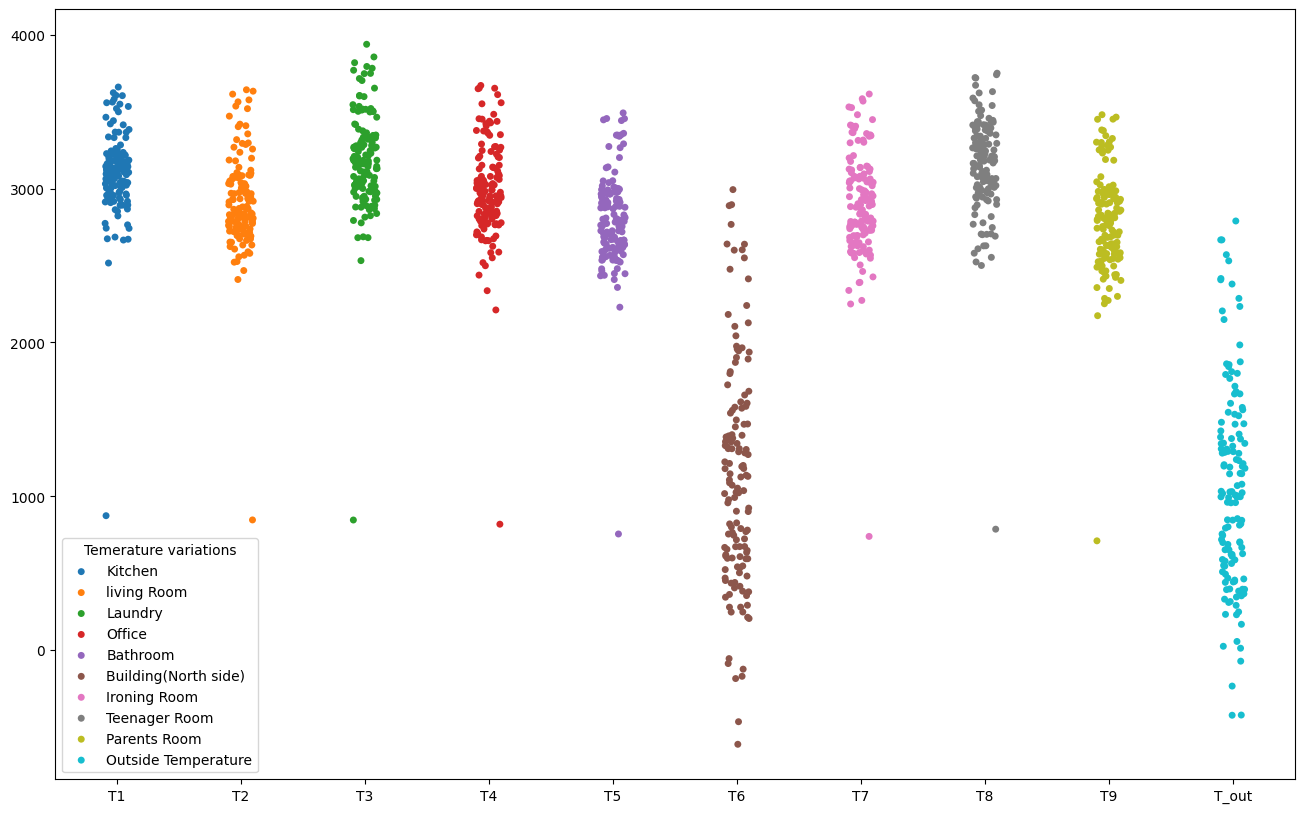

In [ ]:
plt.figure(figsize=(16,10))

sns.stripplot(
    data=df2[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']]

)
plt.legend(title="Temerature variations",labels=['Kitchen','living Room','Laundry','Office','Bathroom','Building(North side)','Ironing Room','Teenager Room','Parents Room','Outside Temperature'])


###we will ignore northside temperature as it is similiar to north side temperature, hence it verifies that sensor was working perfectly and the data gathered is valid. The temperature inside is more or less same

### **Daywise Relative Humidity over 4.5 Months**

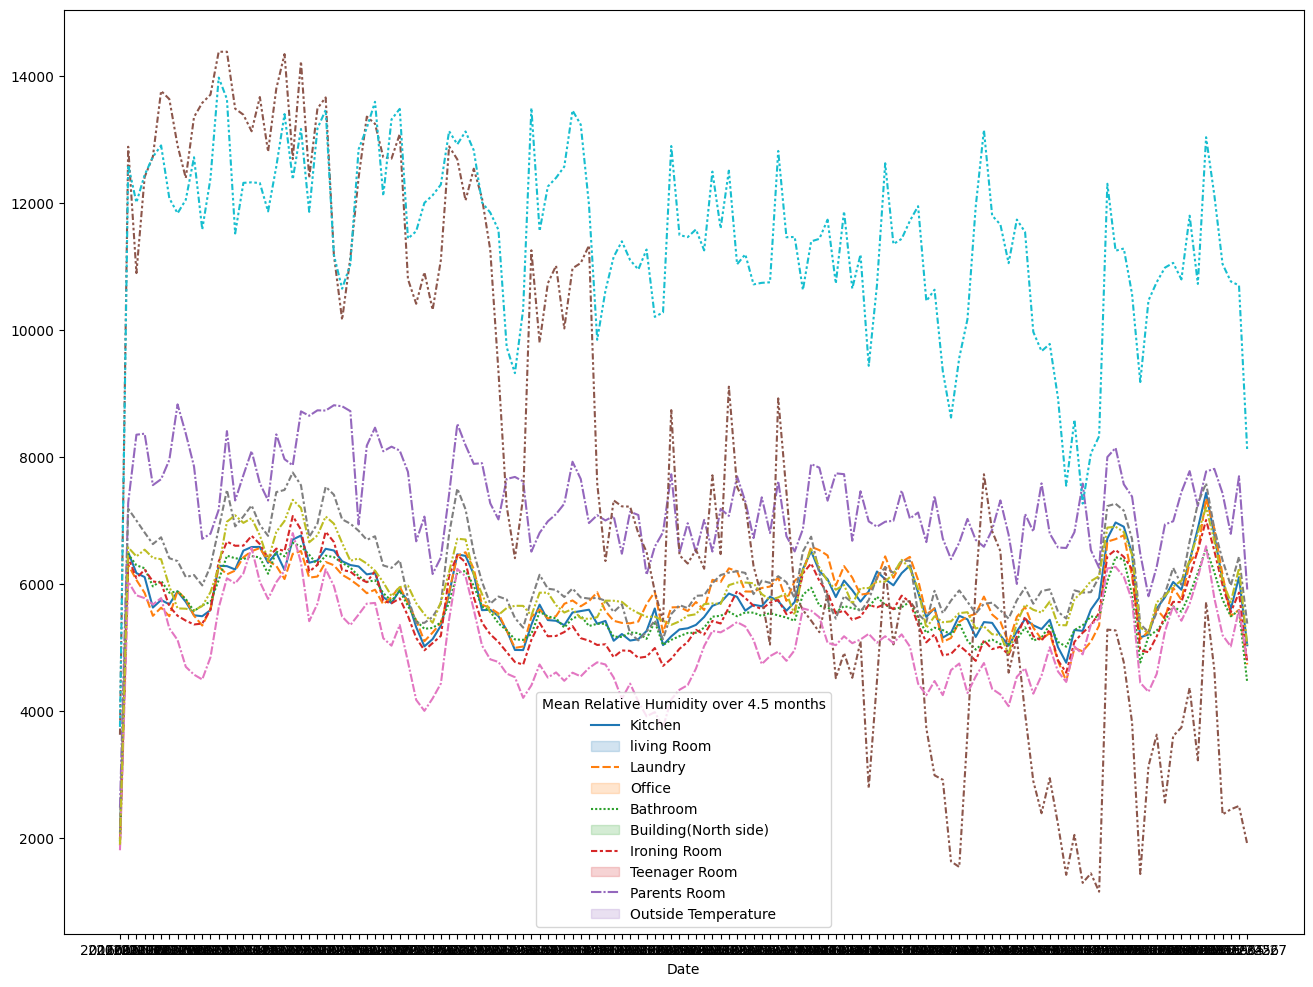

In [ ]:
plt.figure(figsize=(16,12))

sns.lineplot(
    data=df2[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]
      #,height=10, aspect=1.5,


)

plt.legend(title="Mean Relative Humidity over 4.5 months",
           labels=['Kitchen','living Room','Laundry','Office','Bathroom','Building(North side)','Ironing Room','Teenager Room','Parents Room','Outside Temperature'])


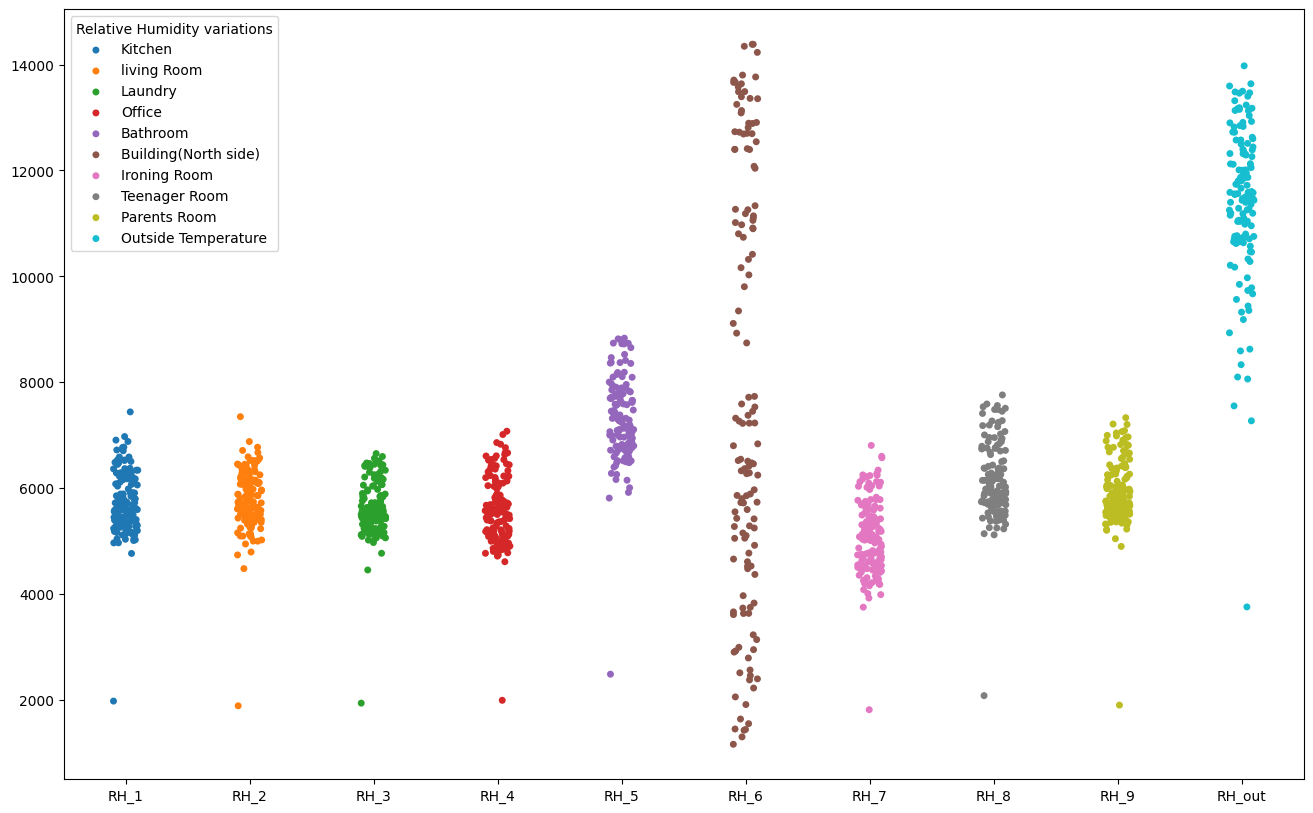

In [ ]:
plt.figure(figsize=(16,10))

sns.stripplot(
     data=df2[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]


)
plt.legend(title="Relative Humidity variations",labels=['Kitchen','living Room','Laundry','Office','Bathroom','Building(North side)','Ironing Room','Teenager Room','Parents Room','Outside Temperature'])


### There is a vaiation in relative humidity of Building (North side) and Outside. The outside humidity is from ariport weather sensor so the humidity can be diferent while the temperature outside the building is different due to the neighbourhood factors like ladnscaping etc., hence we will be ignoring the relative humidity of the airport

###Taking the mean of the temperature and relative humidity inside the house

In [ ]:
df['Mean_house_temp']=df[['T1','T2','T3','T4','T5','T7','T8','T9']].mean(axis=1)
df['Mean_house_temp']

0        18.435000
1        18.439167
2        18.421667
3        18.396250
4        18.408750
           ...    
19730    24.869583
19731    24.846810
19732    24.818571
19733    24.758312
19734    24.740452
Name: Mean_house_temp, Length: 19735, dtype: float64

We can ignore the humidity of the bathroom as the humidity will always be more due to use of water

In [ ]:
df['Mean_relative_humidity']=df[['RH_1','RH_2','RH_3','RH_4','RH_7','RH_8','RH_9']].mean(axis=1)
df['Mean_relative_humidity']

0        45.534286
1        45.454524
2        45.344762
3        45.237143
4        45.230476
           ...    
19730    45.243293
19731    45.198231
19732    45.376463
19733    45.391138
19734    45.332347
Name: Mean_relative_humidity, Length: 19735, dtype: float64

In [ ]:
df.drop(labels=['lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9','Date','date','RH_out'],axis=1, inplace=True)
df

Appliances       RH_6      T_out  Press_mm_hg  Windspeed  Visibility  \
0              60  84.256667   6.600000        733.5   7.000000   63.000000   
1              60  84.063333   6.483333        733.6   6.666667   59.166667   
2              50  83.156667   6.366667        733.7   6.333333   55.333333   
3              50  83.423333   6.250000        733.8   6.000000   51.500000   
4              60  84.893333   6.133333        733.9   5.666667   47.666667   
...           ...        ...        ...          ...        ...         ...   
19730         100   1.000000  22.733333        755.2   3.333333   23.666667   
19731          90   1.000000  22.600000        755.2   3.500000   24.500000   
19732         270   1.000000  22.466667        755.2   3.666667   25.333333   
19733         420   1.000000  22.333333        755.2   3.833333   26.166667   
19734         430   1.000000  22.200000        755.2   4.000000   27.000000   

       Tdewpoint        rv1        rv2  months  hour  Mean_house_temp  \
0       5.300000  13.275433  13.275433       1    17        18.435000   
1       5.200000  18.606195  18.606195       1    17        18.439167   
2       5.100000  28.642668  28.642668       1    17        18.421667   
3       5.000000  45.410389  45.410389       1    17        18.396250   
4       4.900000  10.084097  10.084097       1    17        18.408750   
...          ...        ...        ...     ...   ...              ...   
19730  13.333333  43.096812  43.096812       5    17        24.869583   
19731  13.300000  49.282940  49.282940       5    17        24.846810   
19732  13.266667  29.199117  29.199117       5    17        24.818571   
19733  13.233333   6.322784   6.322784       5    17        24.758312   
19734  13.200000  34.118851  34.118851       5    18        24.740452   

       Mean_relative_humidity  
0                   45.534286  
1                   45.454524  
2                   45.344762  
3                   45.237143  
4                   45.230476  
...                       ...  
19730               45.243293  
19731               45.198231  
19732               45.376463  
19733               45.391138  
19734               45.332347  

[19735 rows x 13 columns]

## Checking distribution of all the features

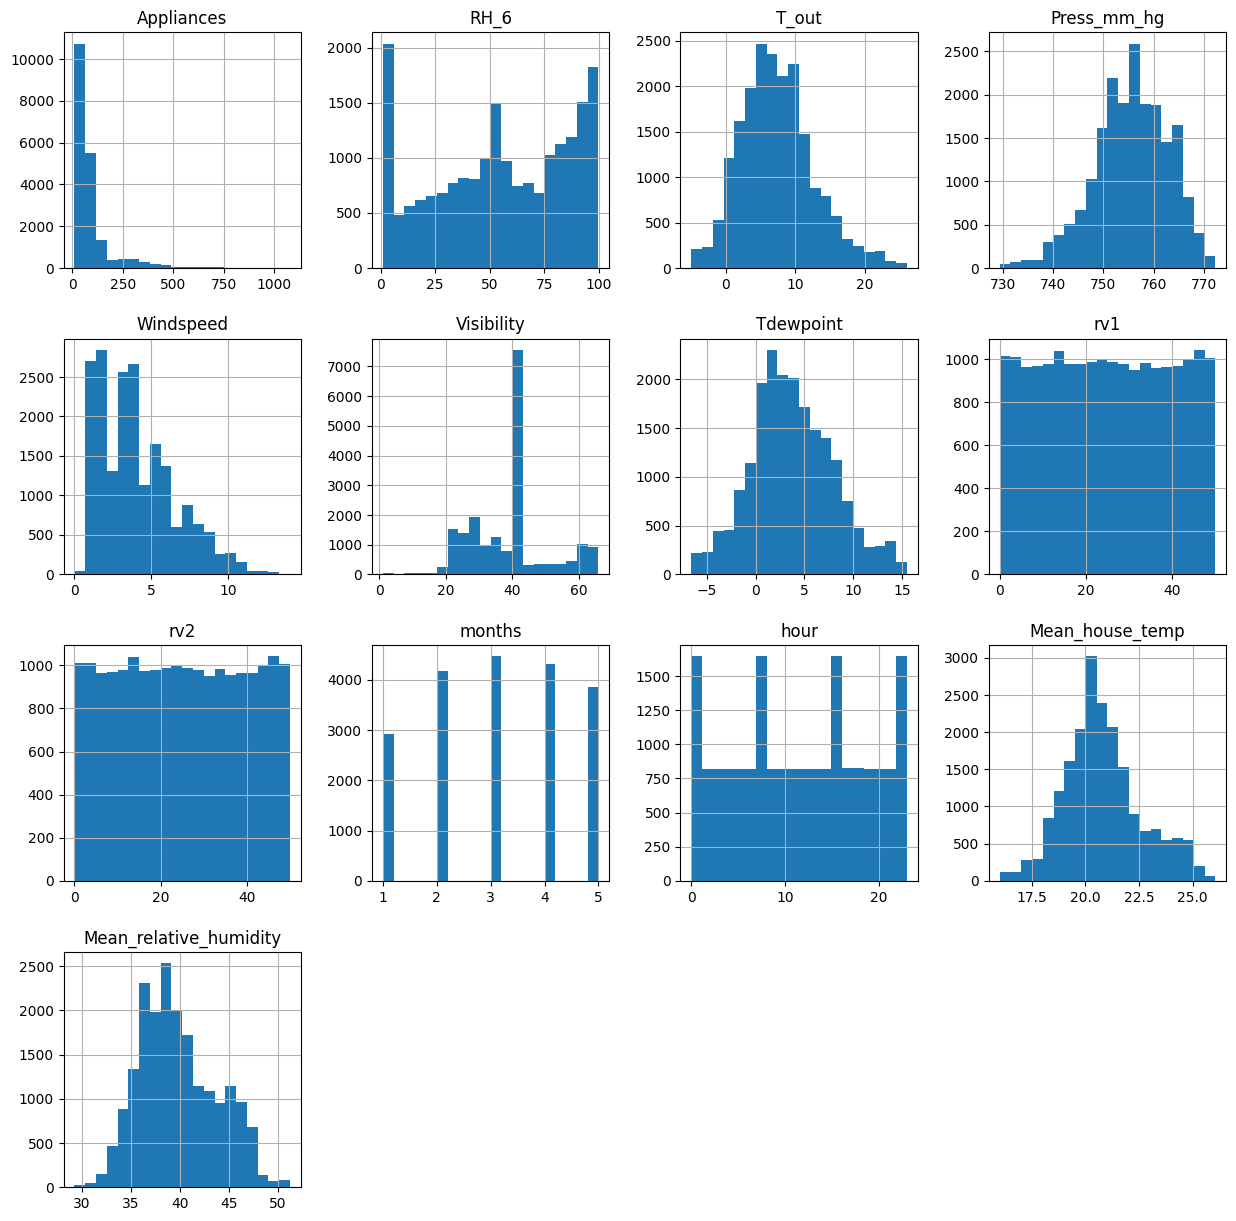

In [ ]:
# lets visualize the histogram of all the features to understand the  distribution

df.hist(bins=20, figsize=(15,15));

Observations

Press_mm_hg, Visibility, Tdewpoint, rv1, rv2,Mean_house_temp,Mean_relative_humidity,months,hour are normal distributed data.

In [ ]:
df.skew()

Appliances                3.386367
RH_6                     -0.241961
T_out                     0.534273
Press_mm_hg              -0.420442
Windspeed                 0.859982
Visibility                0.441554
Tdewpoint                 0.239374
rv1                       0.004945
rv2                       0.004945
months                   -0.067969
hour                     -0.000673
Mean_house_temp           0.387865
Mean_relative_humidity    0.359834
dtype: float64

Observation-

Positively skewed(>1):- Appliances.

Moderately Positively skewed(0.5 to 1):-  T_out,  Windspeed.

Normal Distributed(-0.5 to +0.5):- Press_mm_hg, Visibility, Tdewpoint, rv1, rv2,Mean_house_temp,Mean_relative_humidity,months,hour.

Negative skewed(-0.5 to -1):- RH_6.

Moderately Negtively skewed(>-1):- No Features.

In [ ]:
# Check distribution of each column
# We can modify the distribution to look like a normal distribution - Assumtptions of Linear Regression
# Check which variables have linear dependency on the target
# Correlation of different variables
# etc

## Checking distribution of target variable

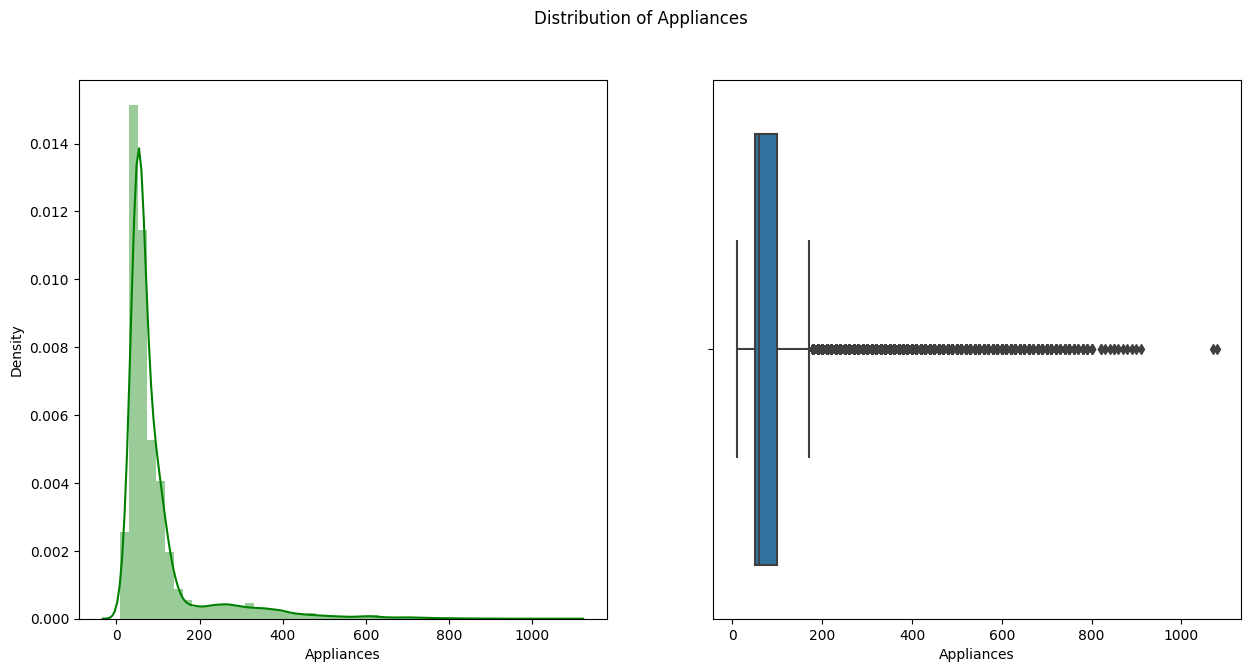

In [ ]:
# Dependent variable 'Appliances'
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color="g")
sns.boxplot(data=df, x='Appliances', ax=axes[1])
plt.show()

Dependent variable is right skewed and lot of outliers present in our data set but they are not ignored at there are sometimes situations when the consumption increases here we see there are lot of such instances.


In [ ]:
# Checking Skewness
df['Appliances'].skew()

3.3863672147430632

Observation-

So our graph is movig towards to y axis as it is positively skewed and we couldn't get any better visualziation with these type of graph.
So,It better to take Log or Square Root or Exponential of the dependent variable to draw the graph.

## Using transformation method on dependent variable

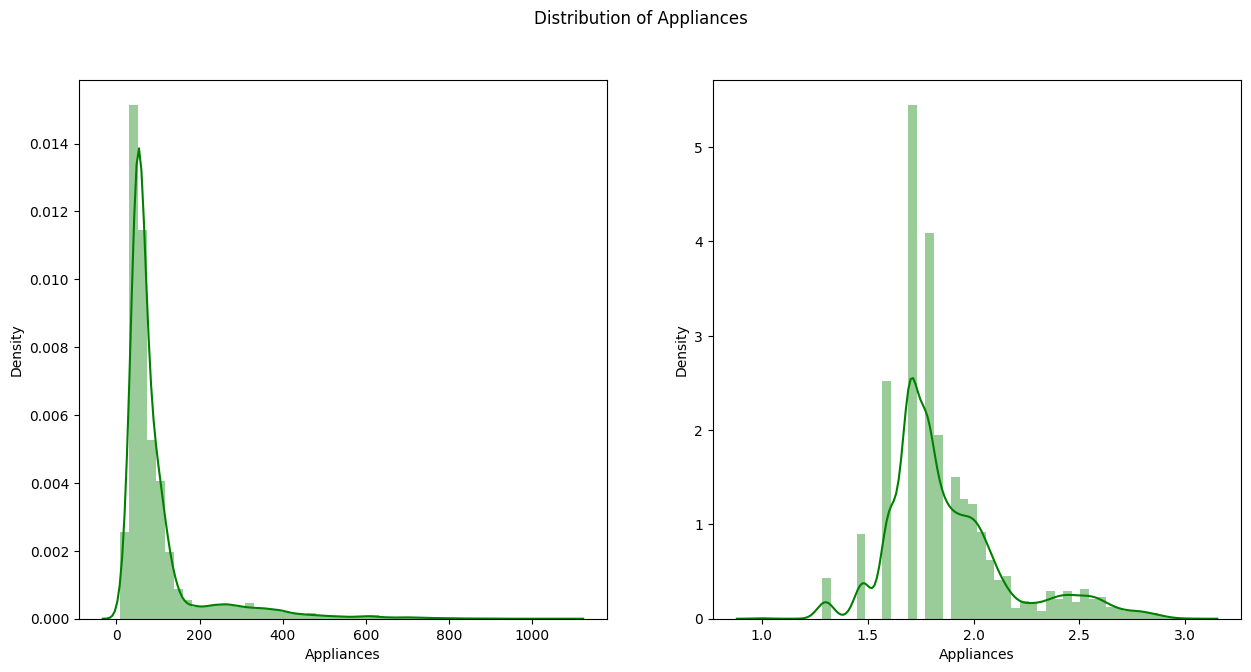

In [ ]:
# Dependent variable 'Appliances'
# Using log transformation to treat the skewness
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color="g")
sns.distplot(np.log10(df['Appliances']),color="g")

plt.show()

*Observation*-

log10 transformation give almost normnal distribution after converting two normal distribution

In [ ]:
# We apply a log transformation on the 'Appliances' (target variable) to convert it's distribution to a normal distribution

In [ ]:
# Apart from Log Transformation:
# Square Root Transformation - X^0.5
# Inverse Transformation - 1/X

In [ ]:
# Earlier the target variable was 'Appliances'
# But now the target variable is 'log10(Appliances)'

# We will be predicting 'log10(Appliances)'
# Let's say Y = log10(Appliances) where Y is the predicted value
# Appliances = 10**Y

# a = logX(b) -> b = X^a

In [ ]:
# Checking Skewness
np.log10(df['Appliances']).skew()

1.1658168888065428

Observation-

We observe that none of the transformations are making our target variable perfectly normal, but still log trasnformation is giving better results than others.

The log Transformation has kind of converted the feature to almost normal distributed. Most of the data points are also falling on the line in the Q-Q plot. So we will be applying log transformation on the target variable.

In [ ]:
df.corr()

Appliances      RH_6     T_out  Press_mm_hg  \
Appliances                1.000000 -0.083178  0.099155    -0.034885   
RH_6                     -0.083178  1.000000 -0.641572    -0.065814   
T_out                     0.099155 -0.641572  1.000000    -0.143249   
Press_mm_hg              -0.034885 -0.065814 -0.143249     1.000000   
Windspeed                 0.087122  0.098317  0.192936    -0.235032   
Visibility                0.000230  0.108705 -0.077367     0.040315   
Tdewpoint                 0.015353 -0.260417  0.790661    -0.244098   
rv1                      -0.011145  0.011671 -0.015216     0.000699   
rv2                      -0.011145  0.011671 -0.015216     0.000699   
months                   -0.011606 -0.814363  0.595751    -0.062178   
hour                      0.216792 -0.190277  0.219802    -0.006215   
Mean_house_temp           0.054740 -0.727213  0.721075    -0.153418   
Mean_relative_humidity   -0.025499  0.434492  0.225179    -0.267507   

                        Windspeed  Visibility  Tdewpoint       rv1       rv2  \
Appliances               0.087122    0.000230   0.015353 -0.011145 -0.011145   
RH_6                     0.098317    0.108705  -0.260417  0.011671  0.011671   
T_out                    0.192936   -0.077367   0.790661 -0.015216 -0.015216   
Press_mm_hg             -0.235032    0.040315  -0.244098  0.000699  0.000699   
Windspeed                1.000000   -0.007516   0.125972 -0.011342 -0.011342   
Visibility              -0.007516    1.000000  -0.042190 -0.005889 -0.005889   
Tdewpoint                0.125972   -0.042190   1.000000 -0.003943 -0.003943   
rv1                     -0.011342   -0.005889  -0.003943  1.000000  1.000000   
rv2                     -0.011342   -0.005889  -0.003943  1.000000  1.000000   
months                  -0.260337   -0.095389   0.470633 -0.002686 -0.002686   
hour                     0.095850   -0.017605   0.024467 -0.013185 -0.013185   
Mean_house_temp         -0.141601   -0.097171   0.590321 -0.005208 -0.005208   
Mean_relative_humidity   0.232437    0.007334   0.608775  0.001232  0.001232   

                          months      hour  Mean_house_temp  \
Appliances             -0.011606  0.216792         0.054740   
RH_6                   -0.814363 -0.190277        -0.727213   
T_out                   0.595751  0.219802         0.721075   
Press_mm_hg            -0.062178 -0.006215        -0.153418   
Windspeed              -0.260337  0.095850        -0.141601   
Visibility             -0.095389 -0.017605        -0.097171   
Tdewpoint               0.470633  0.024467         0.590321   
rv1                    -0.002686 -0.013185        -0.005208   
rv2                    -0.002686 -0.013185        -0.005208   
months                  1.000000 -0.007396         0.830846   
hour                   -0.007396  1.000000         0.108259   
Mean_house_temp         0.830846  0.108259         1.000000   
Mean_relative_humidity -0.235579 -0.159866         0.015785   

                        Mean_relative_humidity  
Appliances                           -0.025499  
RH_6                                  0.434492  
T_out                                 0.225179  
Press_mm_hg                          -0.267507  
Windspeed                             0.232437  
Visibility                            0.007334  
Tdewpoint                             0.608775  
rv1                                   0.001232  
rv2                                   0.001232  
months                               -0.235579  
hour                                 -0.159866  
Mean_house_temp                       0.015785  
Mean_relative_humidity                1.000000

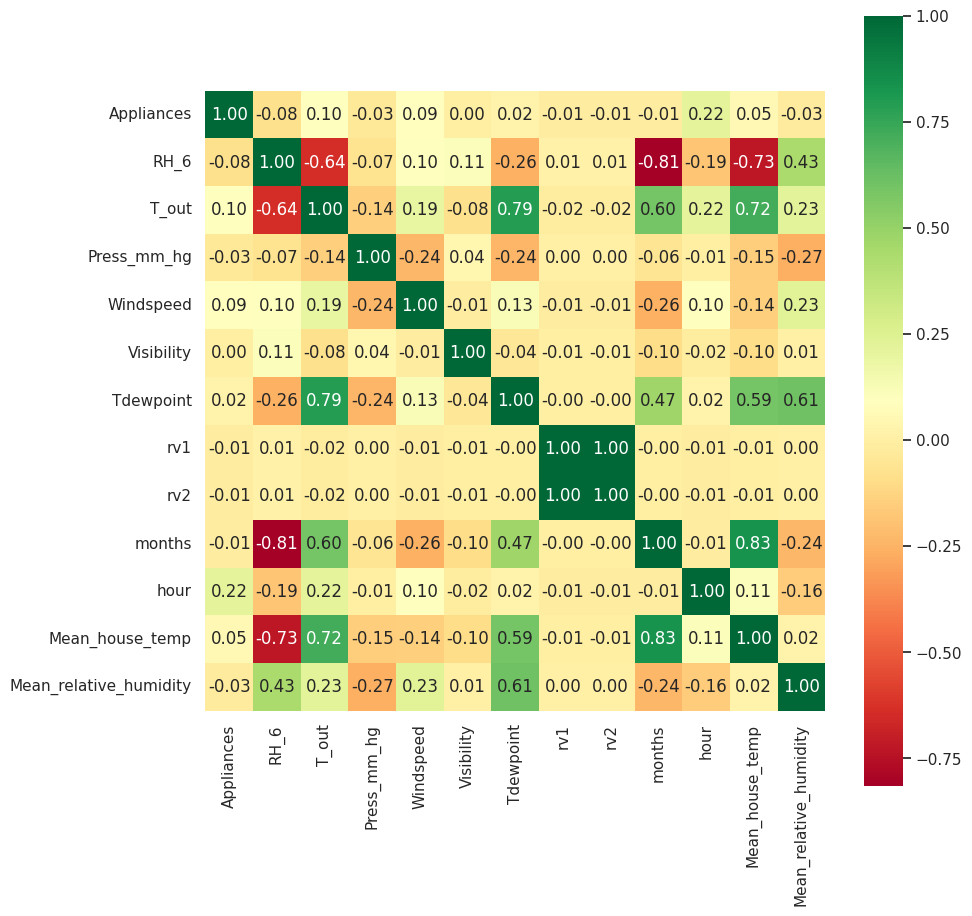

In [ ]:
 ## Correlation
corr = df.corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f')
plt.show();

From correlation plot we can see that the appliance energy consumtion is related to climatic factors like house temperature, relative humidity and wind speed as well as time of day and seson as well

Temperature : All The temperature variable mean house temperature and t_out has positive correlation with target variable

Humidity : There is no significant high correlation for humidity features.

Weather: Visibility , Tdewpoint, press_mm_hg has low correlation.

The random variable rv1, rv2 and visibility , Tdewpoint, press_mm_hg have low correlation with target variable.

In [ ]:
df.describe().columns

Index(['Appliances', 'RH_6', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'months', 'hour', 'Mean_house_temp',
       'Mean_relative_humidity'],
      dtype='object')

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Appliances', 'RH_6', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'months', 'hour', 'Mean_house_temp',
       'Mean_relative_humidity'],
      dtype='object')

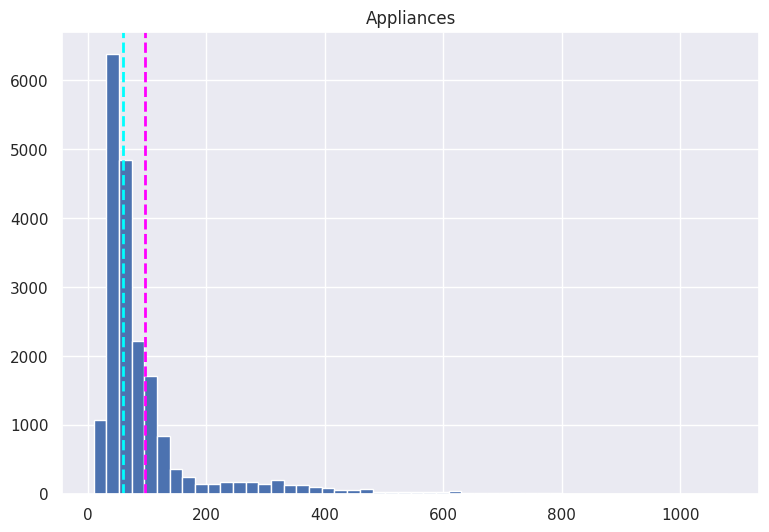

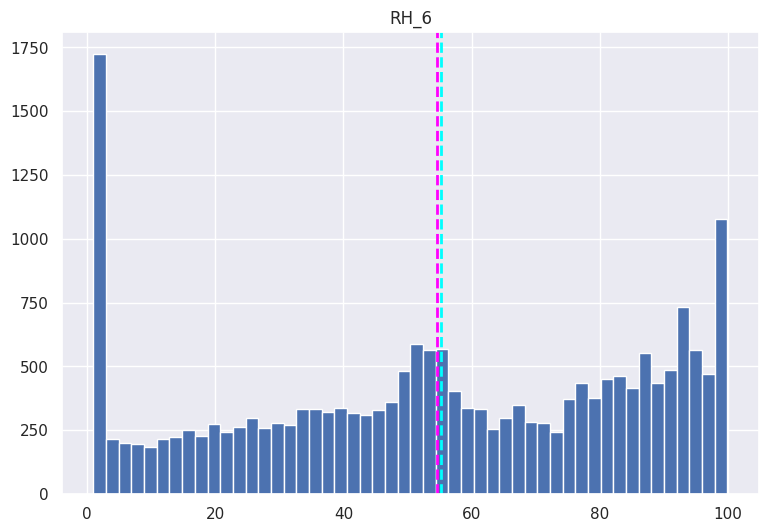

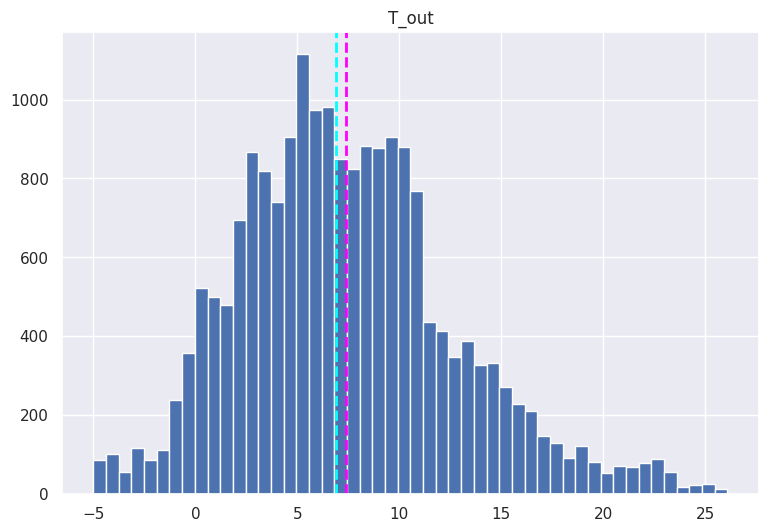

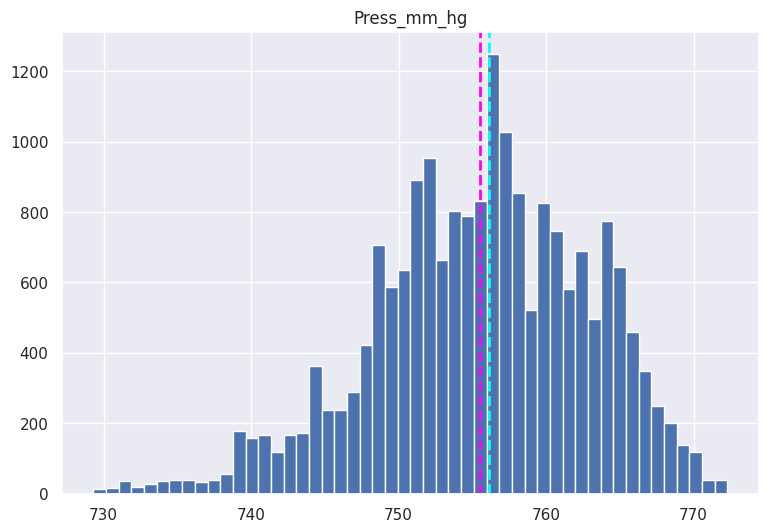

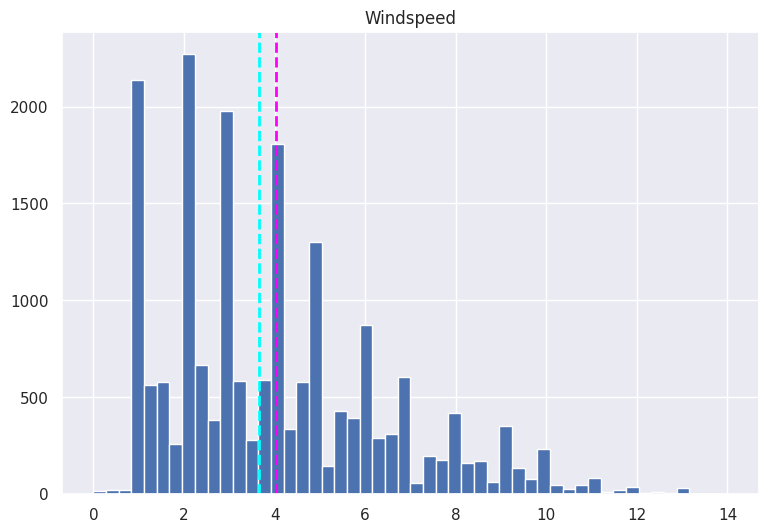

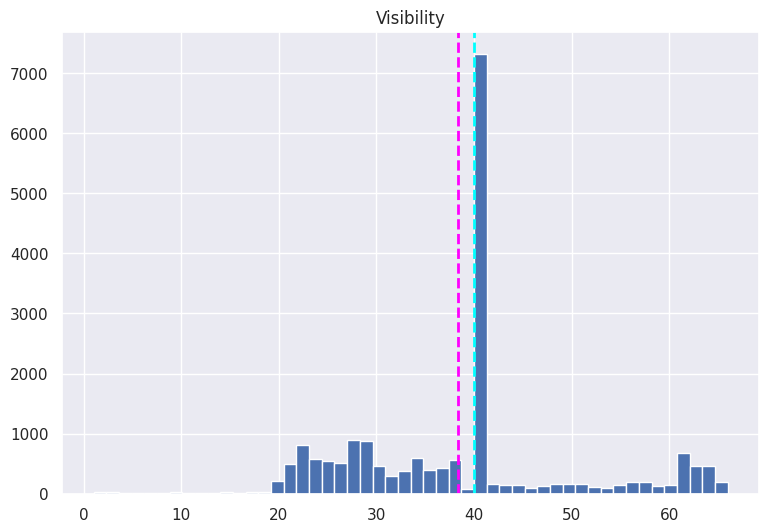

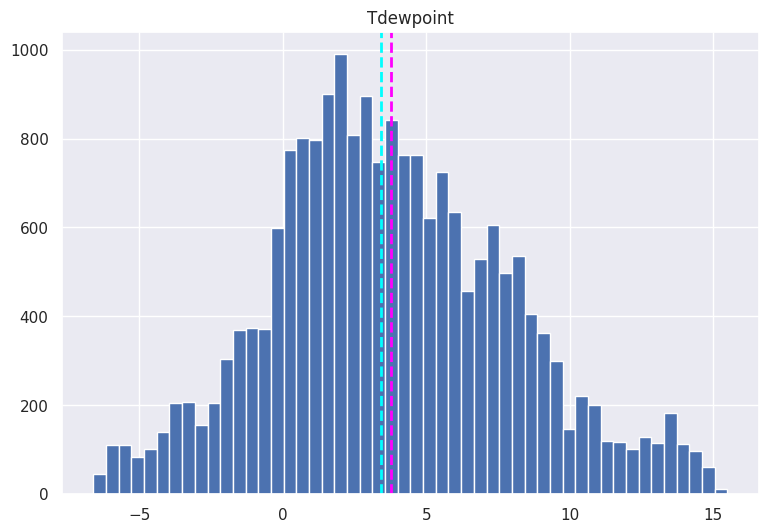

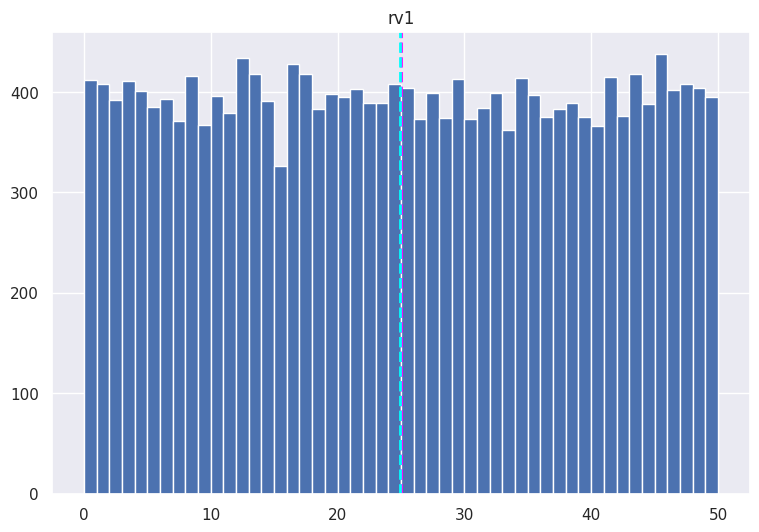

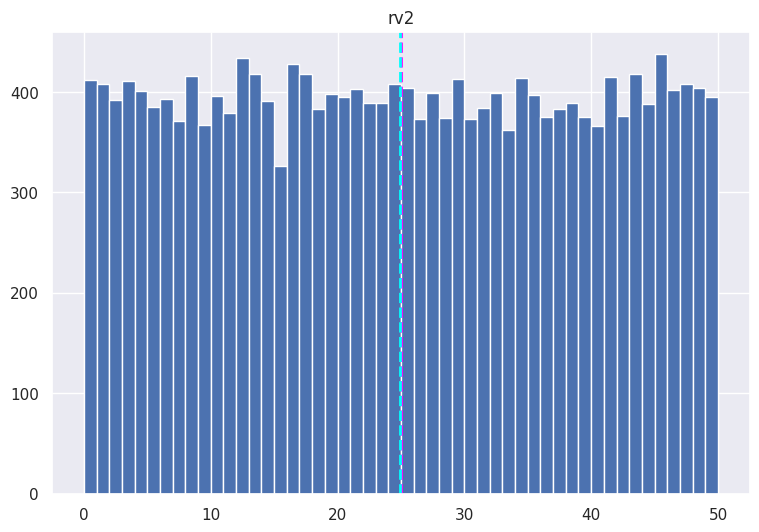

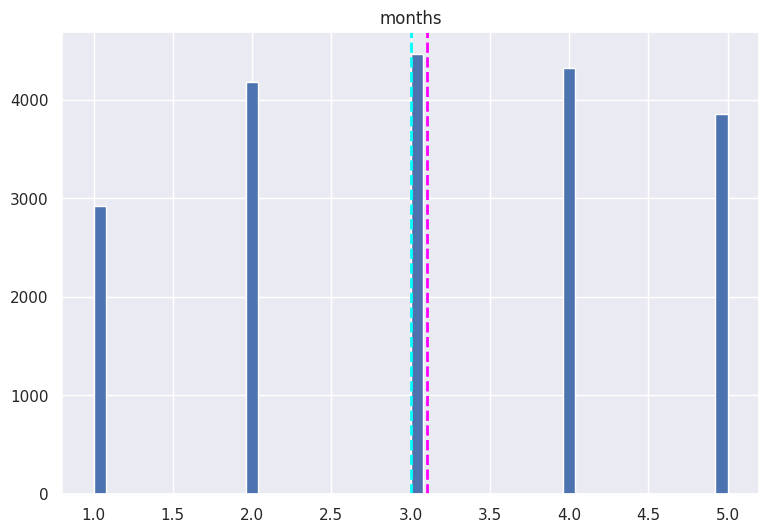

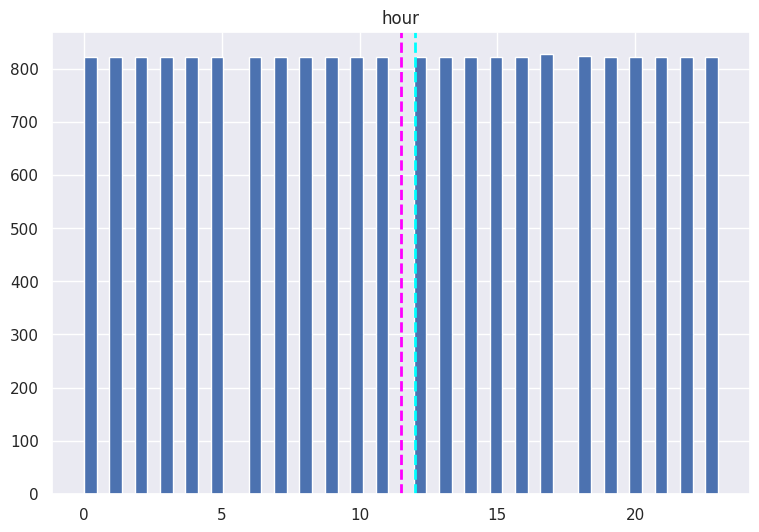

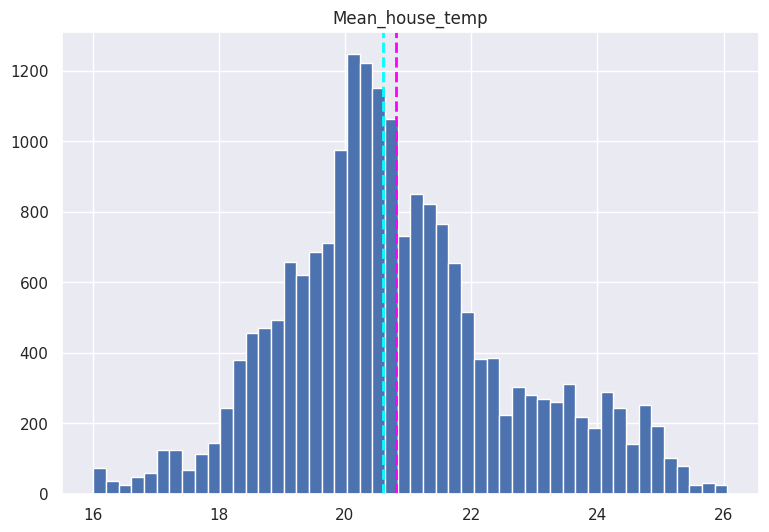

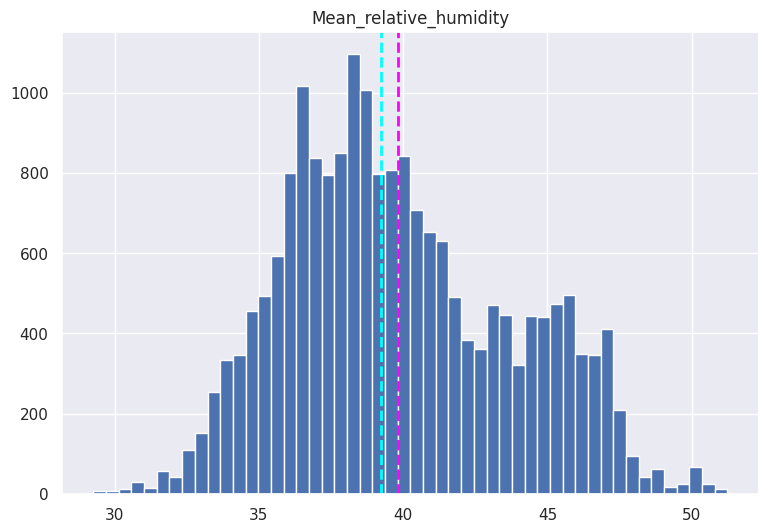

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
# When Mean and Median (50%) are very similar, the distribution is close to a Normal Distribution
# If Mean & Median are close to Centre, the distribution is not skewed

In [ ]:
numeric_features[1:]

Index(['RH_6', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'months', 'hour', 'Mean_house_temp',
       'Mean_relative_humidity'],
      dtype='object')

# **Clean Up**

### Checking duplicate values

In [ ]:
#Checking for duplicates
duplicate_df = len(df[df.duplicated()])
duplicate_df

0

No duplicates are there in our data set

### Checking for Null/Missing Value

In [ ]:
# checking if there are missing values in the datset
df.isnull().sum()

Appliances                0
RH_6                      0
T_out                     0
Press_mm_hg               0
Windspeed                 0
Visibility                0
Tdewpoint                 0
rv1                       0
rv2                       0
months                    0
hour                      0
Mean_house_temp           0
Mean_relative_humidity    0
dtype: int64

### Checking outliers

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances                2138
RH_6                         0
T_out                      436
Press_mm_hg                219
Windspeed                  214
Visibility                2522
Tdewpoint                   10
rv1                          0
rv2                          0
months                       0
hour                         0
Mean_house_temp            512
Mean_relative_humidity       0
dtype: int64

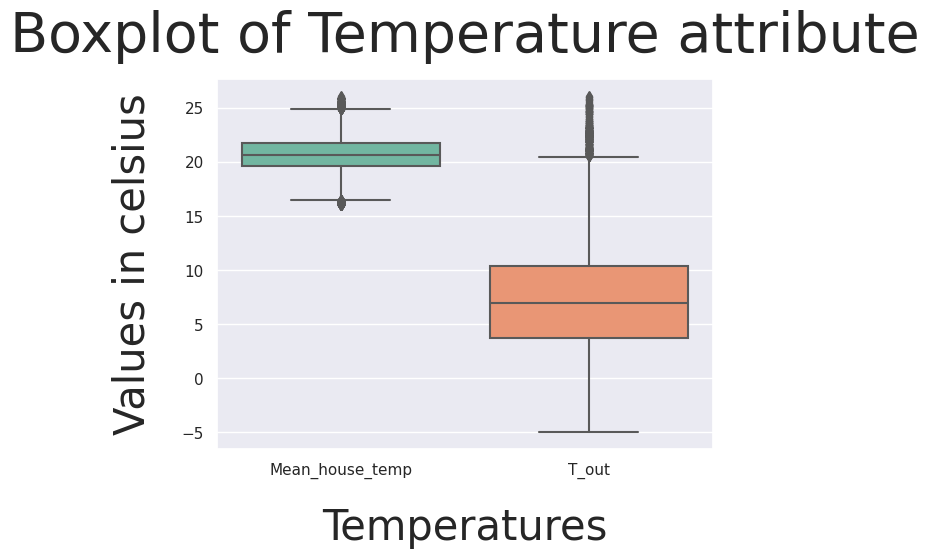

In [ ]:
#lets check oulier ussing seaborn library
ax = sns.boxplot(data = df[['Mean_house_temp',"T_out"]], orient = "v", palette = "Set2")
ax.set_xlabel("Temperatures", fontsize = 30, labelpad = 20)
ax.set_ylabel("Values in celsius", fontsize = 30, labelpad = 20)
ax.set_title("Boxplot of Temperature attribute", fontsize = 40,
            pad = 20)
sns.set(rc={'figure.figsize':(10,10)})

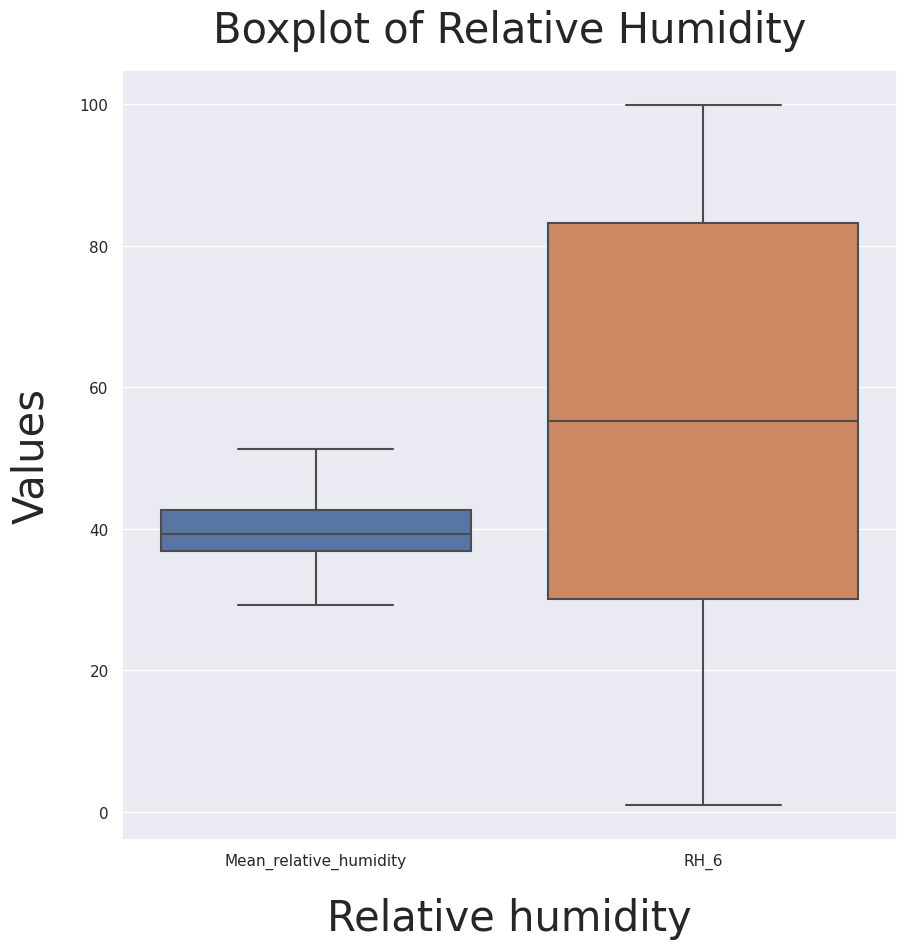

In [ ]:
#lets check outliers in relative humidity
ax= sns.boxplot(data= df[['Mean_relative_humidity','RH_6']],orient='v')
ax.set_xlabel('Relative humidity',fontsize=30, labelpad=20)
ax.set_ylabel('Values',fontsize=30, labelpad=20)
ax.set_title("Boxplot of Relative Humidity", fontsize = 30,
            pad = 20)
sns.set(rc={'figure.figsize':(15,12)})

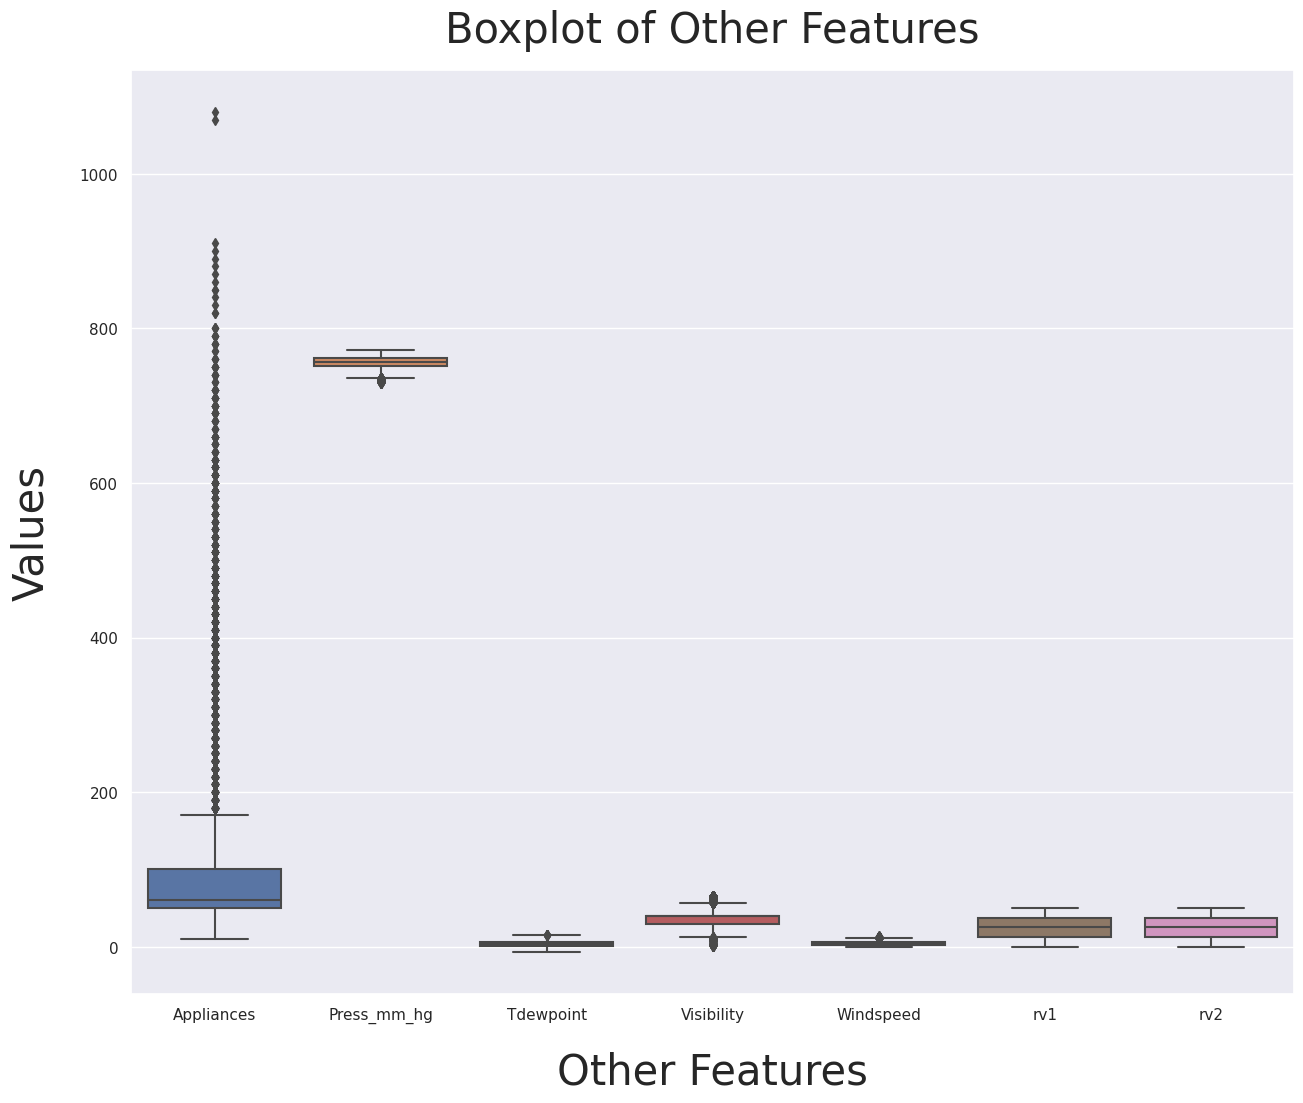

In [ ]:
#lets check outliers
ax= sns.boxplot(data= df[['Appliances','Press_mm_hg','Tdewpoint','Visibility','Windspeed','rv1','rv2']],orient='v')
ax.set_xlabel('Other Features',fontsize=30, labelpad=20)
ax.set_ylabel('Values',fontsize=30, labelpad=20)
ax.set_title("Boxplot of Other Features", fontsize = 30,
            pad = 20)
sns.set(rc={'figure.figsize':(10,8)})

# Feature Engineering

In [ ]:
# One assumption of Linear Regression was that there should be no multicollinearity.
# And the independent variables must show high correlation with the target variable -> High Linear Dependency

In [ ]:
# VIF -> Variance Inflation Factor
# VIF - 5 : High Multicollinearity Existed
# VIF - 1-5 : Moderate Multicollinearity Existed
# VIF < 1 : Low Multicollinearity Existed

## Removing Multicollinearity and selecting relevent features

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

variables         VIF
0                     RH_6   32.198025
1                    T_out   24.955391
2              Press_mm_hg  694.201059
3                Windspeed    5.005911
4               Visibility   11.771633
5                Tdewpoint   17.167612
6                      rv1         inf
7                      rv2         inf
8                   months   53.957730
9                     hour    4.790466
10         Mean_house_temp  627.901451
11  Mean_relative_humidity  519.457911

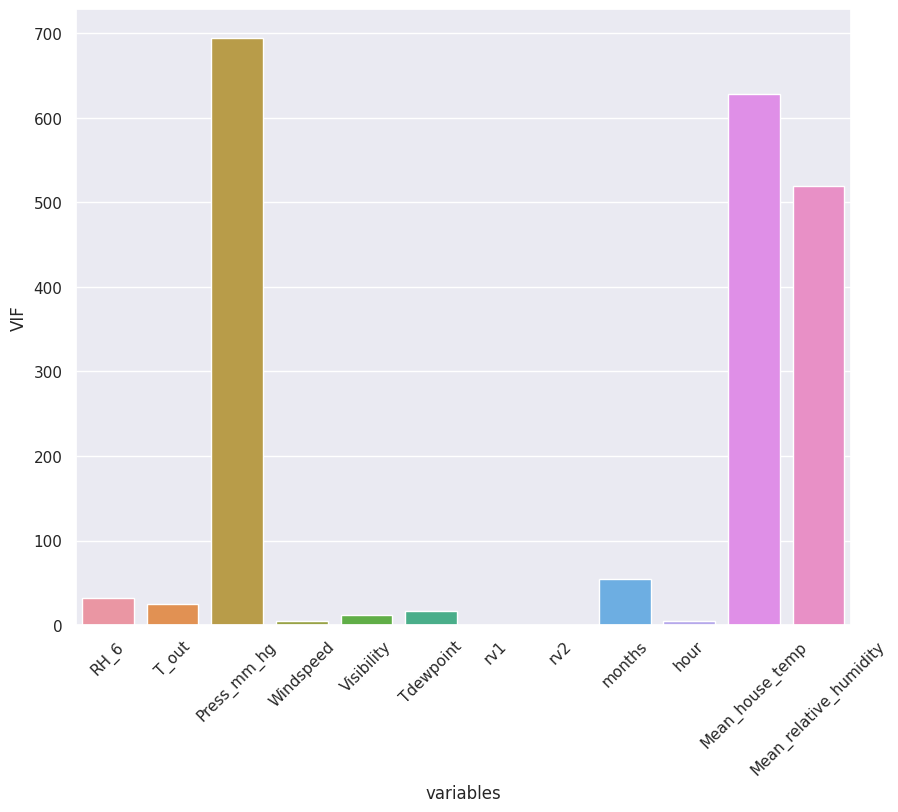

In [ ]:
independent_variables = [i for i in df.describe().columns if i not in ['Appliances']]
sns.barplot(calc_vif(df[independent_variables]),x='variables',y='VIF')
plt.xticks(rotation = 45)
calc_vif(df[independent_variables])

Remove rv1 , rv2 because that has infinite Variance Inflation Factor.


variables       VIF
0        RH_6  3.892467
1   Windspeed  3.458843
2  Visibility  5.159881
3   Tdewpoint  1.815308

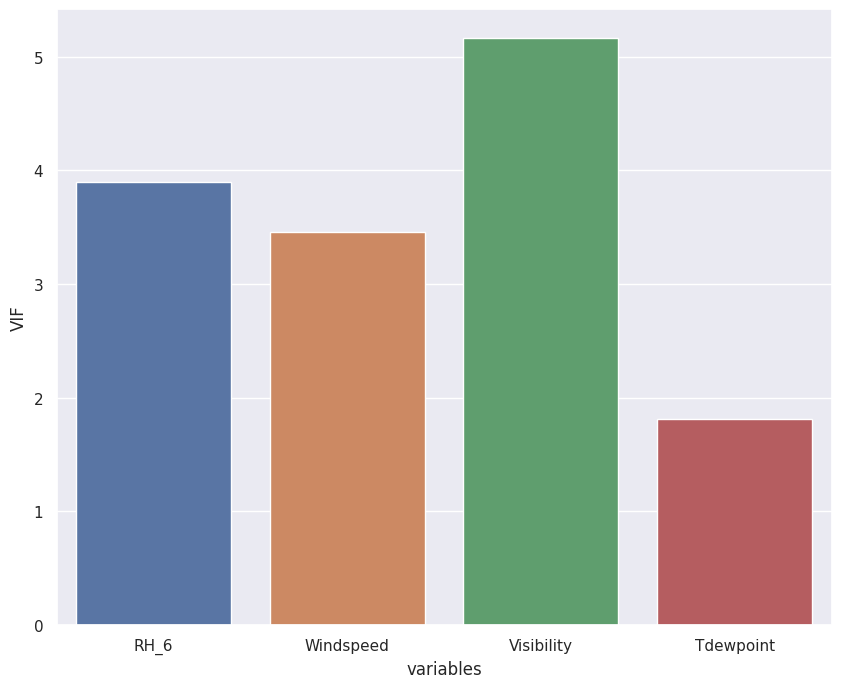

In [ ]:
independent_variables = [i for i in df.describe().columns if i not in ['Appliances','months','hour','rv1','rv2','lights','Mean_house_temp','Mean_relative_humidity','T_out', 'Press_mm_hg', 'RH_out','Mean_house_temp']]
sns.barplot(calc_vif(df[independent_variables]),x='variables',y='VIF')
calc_vif(df[independent_variables])

After Removing Multicollinearity of Independent Variables

1-RH_6(3.892468),Windspeed(3.458756),Tdewpoint(1.815175) :-Moderate Multicollinearity Existed

2-Visibility(5.159890) :-High Multicollinearity Existed



In [ ]:
# Describing the steps of Feature Selection
# - Make a correlation heat map
# - Get the VIF Scores
# - Iterate over:
#   * We will remove highly correlated features first
#   * We can create a new variable using highly correlated 2-3 variables
#   * From VIF we will check the features having high VIF, and remove the one that have low correlation with the target variable

### Correlation feature selection

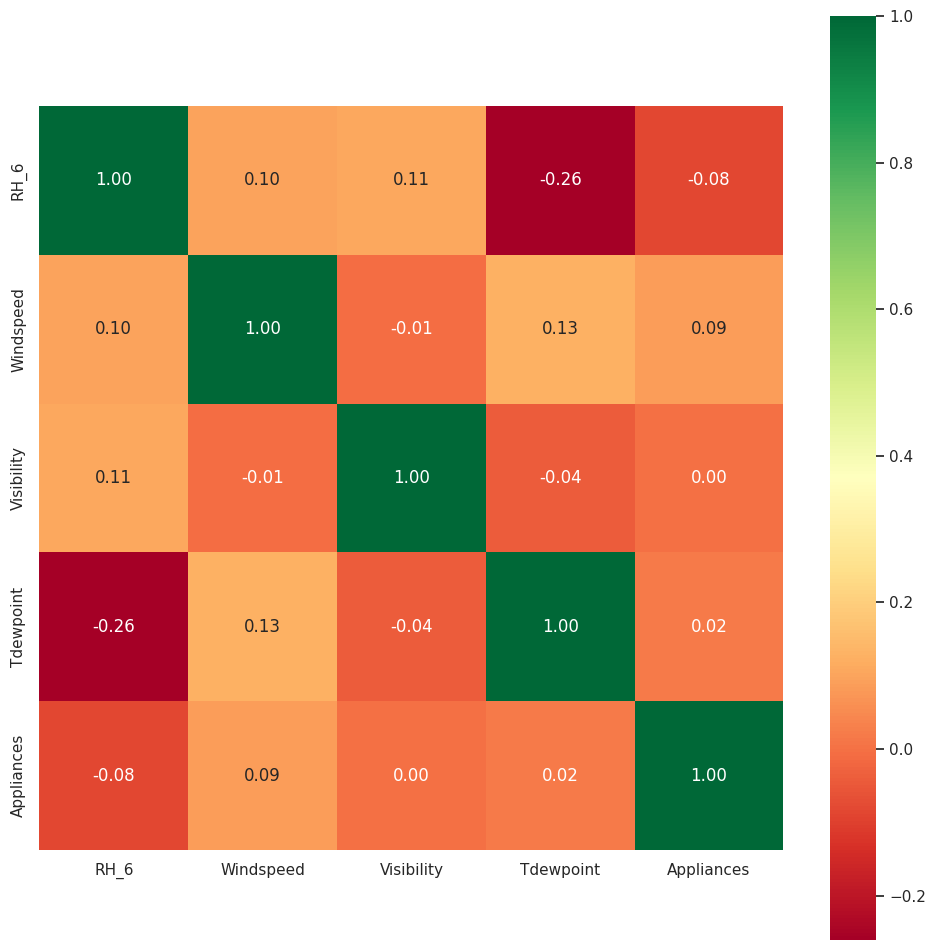

In [ ]:
# Updating the dataset
dataset = df[independent_variables + ["Appliances"]]
#checking corelations
corr = dataset.corr()
plt.figure(figsize = (12,12))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f')
plt.show();

Negative Correlation of -0.26 between RH_6 and Tdewpoint.


In [ ]:
df.drop(labels=['rv1','rv2'],axis=1, inplace=True)
df

Appliances       RH_6      T_out  Press_mm_hg  Windspeed  Visibility  \
0              60  84.256667   6.600000        733.5   7.000000   63.000000   
1              60  84.063333   6.483333        733.6   6.666667   59.166667   
2              50  83.156667   6.366667        733.7   6.333333   55.333333   
3              50  83.423333   6.250000        733.8   6.000000   51.500000   
4              60  84.893333   6.133333        733.9   5.666667   47.666667   
...           ...        ...        ...          ...        ...         ...   
19730         100   1.000000  22.733333        755.2   3.333333   23.666667   
19731          90   1.000000  22.600000        755.2   3.500000   24.500000   
19732         270   1.000000  22.466667        755.2   3.666667   25.333333   
19733         420   1.000000  22.333333        755.2   3.833333   26.166667   
19734         430   1.000000  22.200000        755.2   4.000000   27.000000   

       Tdewpoint  months  hour  Mean_house_temp  Mean_relative_humidity  
0       5.300000       1    17        18.435000               45.534286  
1       5.200000       1    17        18.439167               45.454524  
2       5.100000       1    17        18.421667               45.344762  
3       5.000000       1    17        18.396250               45.237143  
4       4.900000       1    17        18.408750               45.230476  
...          ...     ...   ...              ...                     ...  
19730  13.333333       5    17        24.869583               45.243293  
19731  13.300000       5    17        24.846810               45.198231  
19732  13.266667       5    17        24.818571               45.376463  
19733  13.233333       5    17        24.758312               45.391138  
19734  13.200000       5    18        24.740452               45.332347  

[19735 rows x 11 columns]

In [ ]:
#Defining the dependent and independent variables, we will here drop r1 and r2 as they have infinite VIF
X = df[[ 'T_out', 'Press_mm_hg', 'RH_6',
       'Windspeed', 'Visibility', 'Tdewpoint', 'months', 'hour',
       'Mean_house_temp', 'Mean_relative_humidity']]
y = df[['Appliances']]

In [ ]:
X.describe().T

count        mean        std         min  \
T_out                   19735.0    7.411665   5.317409   -5.000000   
Press_mm_hg             19735.0  755.522602   7.399441  729.300000   
RH_6                    19735.0   54.609083  31.149806    1.000000   
Windspeed               19735.0    4.039752   2.451221    0.000000   
Visibility              19735.0   38.330834  11.794719    1.000000   
Tdewpoint               19735.0    3.760707   4.194648   -6.600000   
months                  19735.0    3.101647   1.339200    1.000000   
hour                    19735.0   11.502002   6.921953    0.000000   
Mean_house_temp         19735.0   20.815611   1.812567   16.012708   
Mean_relative_humidity  19735.0   39.832333   3.929901   29.264857   

                               25%         50%         75%         max  
T_out                     3.666667    6.916667   10.408333   26.100000  
Press_mm_hg             750.933333  756.100000  760.933333  772.300000  
RH_6                     30.025000   55.290000   83.226667   99.900000  
Windspeed                 2.000000    3.666667    5.500000   14.000000  
Visibility               29.000000   40.000000   40.000000   66.000000  
Tdewpoint                 0.900000    3.433333    6.566667   15.500000  
months                    2.000000    3.000000    4.000000    5.000000  
hour                      6.000000   12.000000   17.000000   23.000000  
Mean_house_temp          19.663000   20.597500   21.764375   26.061940  
Mean_relative_humidity   36.826714   39.224490   42.698075   51.238571

In [ ]:
y.describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(15788, 10)
(3947, 10)


In [ ]:
X_train.columns

Index(['T_out', 'Press_mm_hg', 'RH_6', 'Windspeed', 'Visibility', 'Tdewpoint',
       'months', 'hour', 'Mean_house_temp', 'Mean_relative_humidity'],
      dtype='object')

In [ ]:
X_test.columns

Index(['T_out', 'Press_mm_hg', 'RH_6', 'Windspeed', 'Visibility', 'Tdewpoint',
       'months', 'hour', 'Mean_house_temp', 'Mean_relative_humidity'],
      dtype='object')

In [ ]:
# Two methods of scaling
# - Standardinzation -> Xi = (Xi-Xmin)/(Xmax-Xmin)
# - Normalization -> Xi = (Xi - Mean)/Standard_Deviation

In [ ]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# Model Training

### Fitting LinearRegression Model

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#check the score
reg.score(X_train,y_train)

0.06387699074963138

In [ ]:
#check the coefficeint
reg.coef_

array([[ 0.02786152, -0.02442251, -0.14291443,  0.03398849,  0.01135385,
        -0.01790656, -0.20810198,  0.17300515,  0.0971333 ,  0.00196945]])

In [ ]:
#check the intercept
reg.intercept_

array([-3.41226422e-16])

In [ ]:
#get the X_train and X-test value
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)

In [ ]:
y_pred_test

array([[ 0.30340111],
       [ 0.23707991],
       [ 0.22061669],
       ...,
       [-0.26893404],
       [-0.07137699],
       [ 0.16290634]])

In [ ]:
y_test

array([[ 1.89984097],
       [-0.46613728],
       [ 1.60409369],
       ...,
       [-0.46613728],
       [ 1.9984234 ],
       [-0.26897242]])

In [ ]:
y_pred_train

array([[ 0.26814957],
       [-0.48124594],
       [-0.31220241],
       ...,
       [-0.30593823],
       [ 0.28921653],
       [ 0.16808091]])

In [ ]:
y_train

array([[-0.66330213],
       [-0.46613728],
       [-0.5647197 ],
       ...,
       [-0.26897242],
       [ 0.02677486],
       [ 0.02677486]])

## Train Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_train,y_pred_train)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_train,y_pred_train)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_train,y_pred_train)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  0.9361230092503686
RMSE :  0.9675345002894566
r2 score :  0.06387699074963138
Adjusted_R2 :  0.06403927985214564


## Test Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_test,y_pred_test)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_test,y_pred_test)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_test,y_pred_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  1.0427350880449096
RMSE :  1.0211440094545479
r2 score :  0.058171955223783156
Adjusted_R2 :  0.05831974982546961


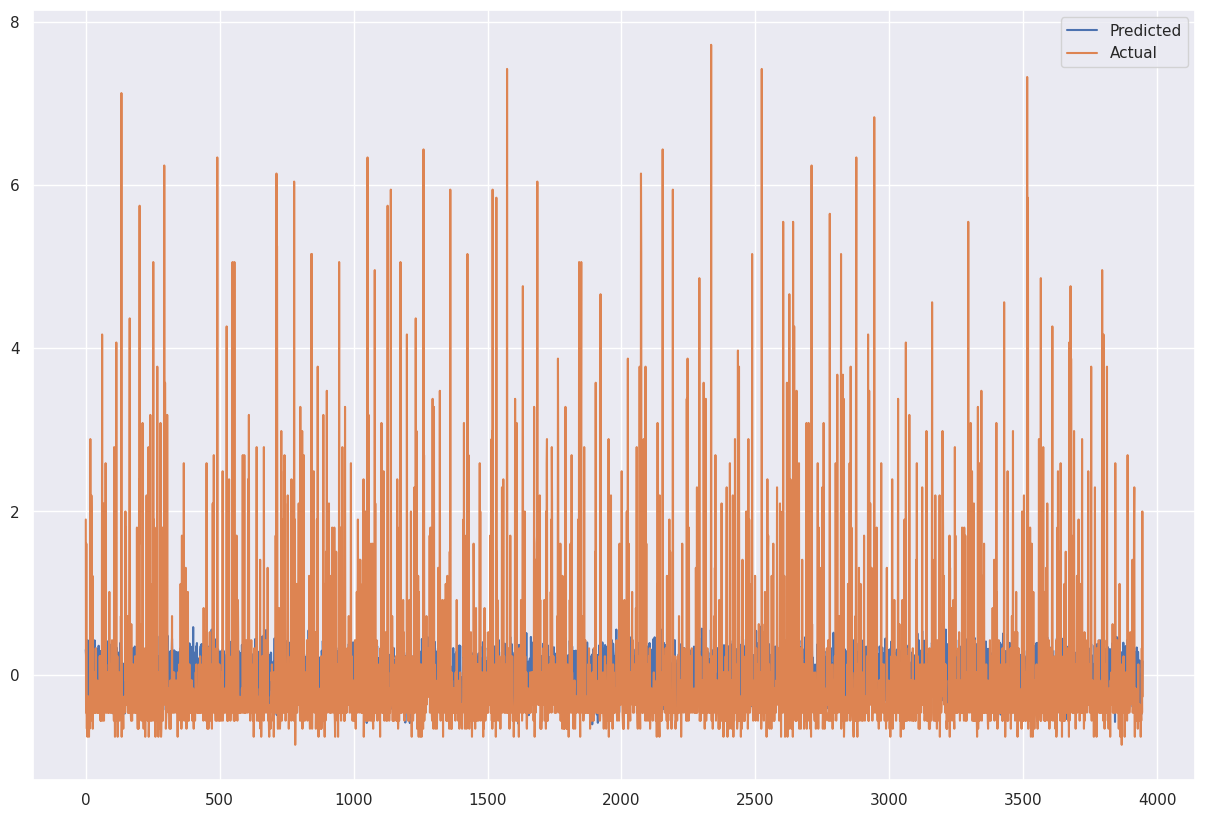

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Fitting Regularized Regression

# Lasso Regression

In [ ]:
# Create an instance of Lasso Regression implementation
lasso=Lasso(alpha=0.0001,max_iter=4000)
# Fit the Lasso model
lasso.fit(X_train,y_train)


Lasso(alpha=0.0001, max_iter=4000)

In [ ]:
# Create the model score
lasso.score(X_train,y_train)

0.06387662195864963

In [ ]:
#check the coefficeint
lasso.coef_

array([ 0.02747074, -0.02430704, -0.14237464,  0.03403868,  0.01121379,
       -0.01684674, -0.20772454,  0.17297525,  0.09679443,  0.0011897 ])

In [ ]:
#check the intercept
lasso.intercept_

array([-3.37641549e-16])

In [ ]:
### Cross validation
lasso=Lasso()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best fit alpha value is :",lasso_regressor.best_params_)
print("\nusing",lasso_regressor.best_params_,"the negative mean squred error is : ",lasso_regressor.best_score_)

Best fit alpha value is : {'alpha': 0.001}

using {'alpha': 0.001} the negative mean squred error is :  -0.9371760006962736


In [ ]:
#get the X_train and X-test value
y_pred_lasso_test=lasso_regressor.predict(X_test)
y_pred_lasso_train=lasso_regressor.predict(X_train)

In [ ]:
y_pred_lasso_test

array([ 0.29684375,  0.23944457,  0.21715229, ..., -0.25971687,
       -0.06885506,  0.1617896 ])

In [ ]:
y_pred_lasso_train

array([ 0.27288773, -0.47779689, -0.31303164, ..., -0.30296563,
        0.28719177,  0.16471469])

## Train Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_train,y_pred_lasso_train)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_train,y_pred_lasso_train)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_train,y_pred_lasso_train)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  0.9361491158722062
RMSE :  0.9675479915085381
r2 score :  0.06385088412779383
Adjusted_R2 :  0.06401310690250872


## Test Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_test,y_pred_lasso_test)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_test,y_pred_lasso_test)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_test,y_pred_lasso_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  1.042983204676392
RMSE :  1.0212654917681259
r2 score :  0.05794784921202156
Adjusted_R2 :  0.05809507443867812


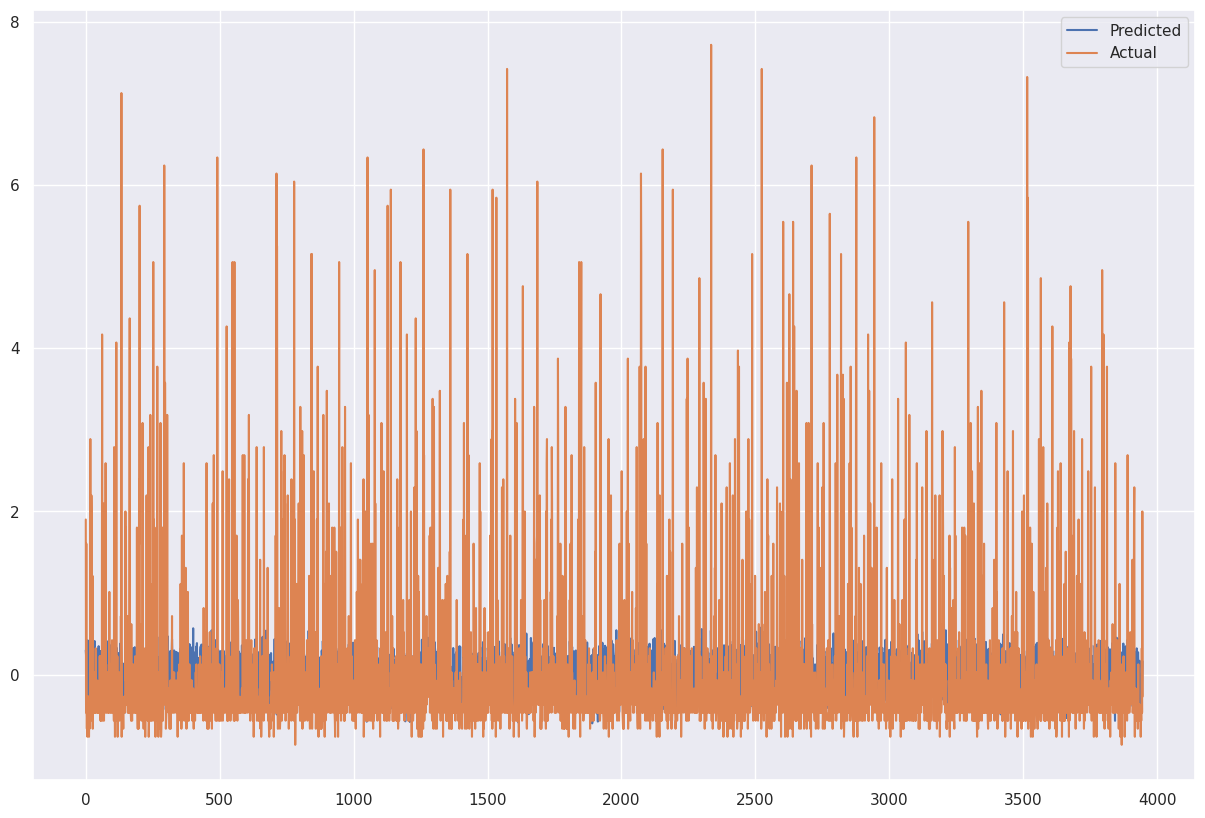

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_lasso_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Ridge Regression

In [ ]:
### Cross validation
ridge=Ridge()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best fit alpha value in ridge is :",ridge_regressor.best_params_)
print("\nusing",ridge_regressor.best_params_,"the negative mean squred error is : ",ridge_regressor.best_score_)

Best fit alpha value in ridge is : {'alpha': 45}

using {'alpha': 45} the negative mean squred error is :  -0.9372137412810606


In [ ]:
#get the X_train and X-test value
y_pred_ridge_test=ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

In [ ]:
y_pred_ridge_test

array([[ 0.30517249],
       [ 0.23909085],
       [ 0.21916778],
       ...,
       [-0.26456781],
       [-0.07343705],
       [ 0.15929533]])

In [ ]:
y_pred_ridge_train

array([[ 0.26605056],
       [-0.47874927],
       [-0.31089727],
       ...,
       [-0.30714504],
       [ 0.28626584],
       [ 0.16845295]])

## Train Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_train,y_pred_ridge_train)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_train,y_pred_ridge_train)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_train,y_pred_ridge_train)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  0.9361286243645538
RMSE :  0.9675374020494266
r2 score :  0.0638713756354462
Adjusted_R2 :  0.06403365047191834


## Test Data

In [ ]:
#calculate MSE
MSE=mean_squared_error(y_test,y_pred_ridge_test)
print("MSE : ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
#calculate r2
r2=r2_score(y_test,y_pred_ridge_test)
print("r2 score : ",r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(y_test,y_pred_ridge_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted_R2 : ",Adjusted_R2)

MSE :  1.0426967084550844
RMSE :  1.0211252168343923
r2 score :  0.05820662076295868
Adjusted_R2 :  0.058354503437661354


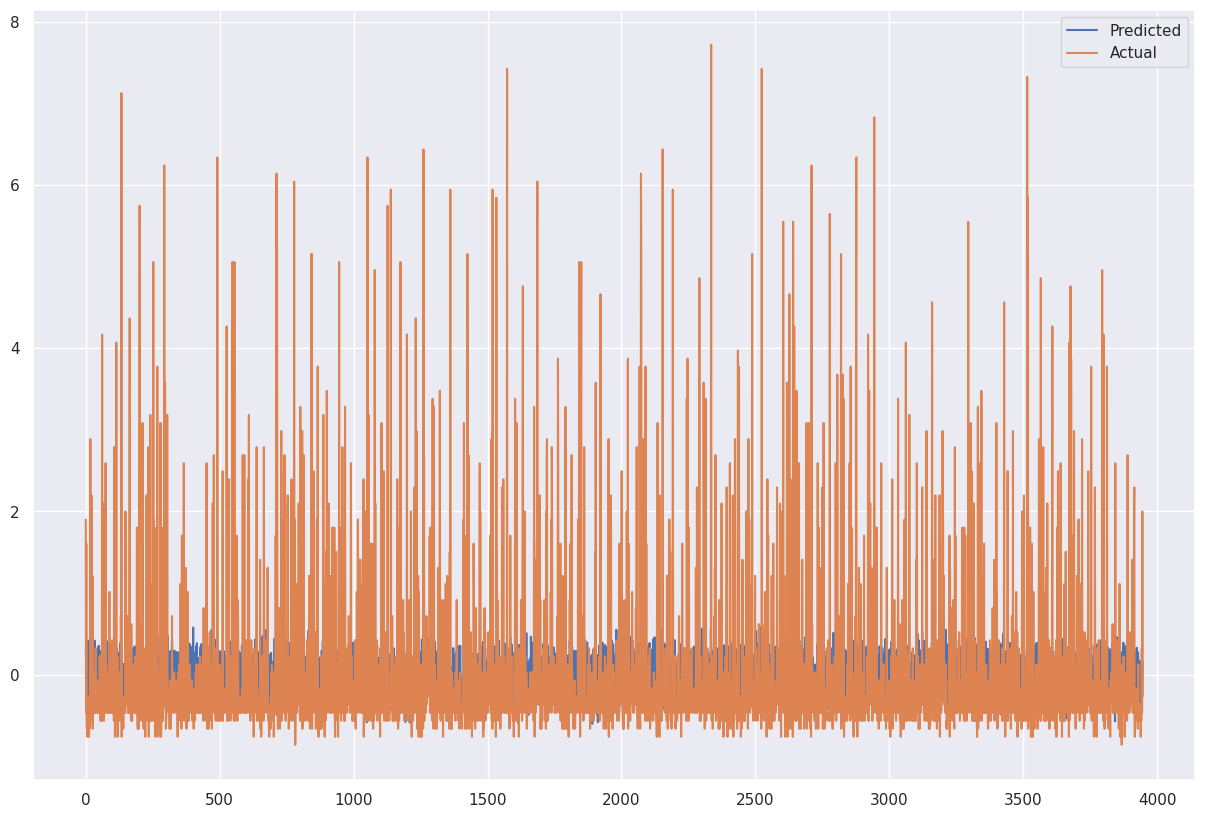

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_ridge_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **ElasticNet**

In [ ]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fit the Elastic net model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.04810252056373643

In [ ]:
y_pred_elasticnet = elasticnet.predict(X_test)

In [ ]:
#calculate MSE
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elasticnet))
print("MSE :" , MSE)
#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#calculate r2
r2 = r2_score(10**(y_test), 10**(y_pred_elasticnet))
print("R2 :" ,r2)
#calculate Adjusted R2
Adjusted_R2 = (1-(1-r2_score(10**(y_test), 10**(y_pred_elasticnet)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted_R2 : ",Adjusted_R2)

MSE : 1216886966531.5703
RMSE : 1103125.9975775979
R2 : -0.0016476957450619611
Adjusted_R2 :  -0.00419253237043038


In [ ]:
### Cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.9371794000966952


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)
#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#calculate r2
r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
#calculate Adjusted R2
Adjusted_R2  = (1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted_R2 : ",Adjusted_R2)

MSE : 1216886947552.2954
RMSE : 1103125.9889751014
R2 : -0.0016476801227836013
Adjusted_R2 :  -0.004192516708461325


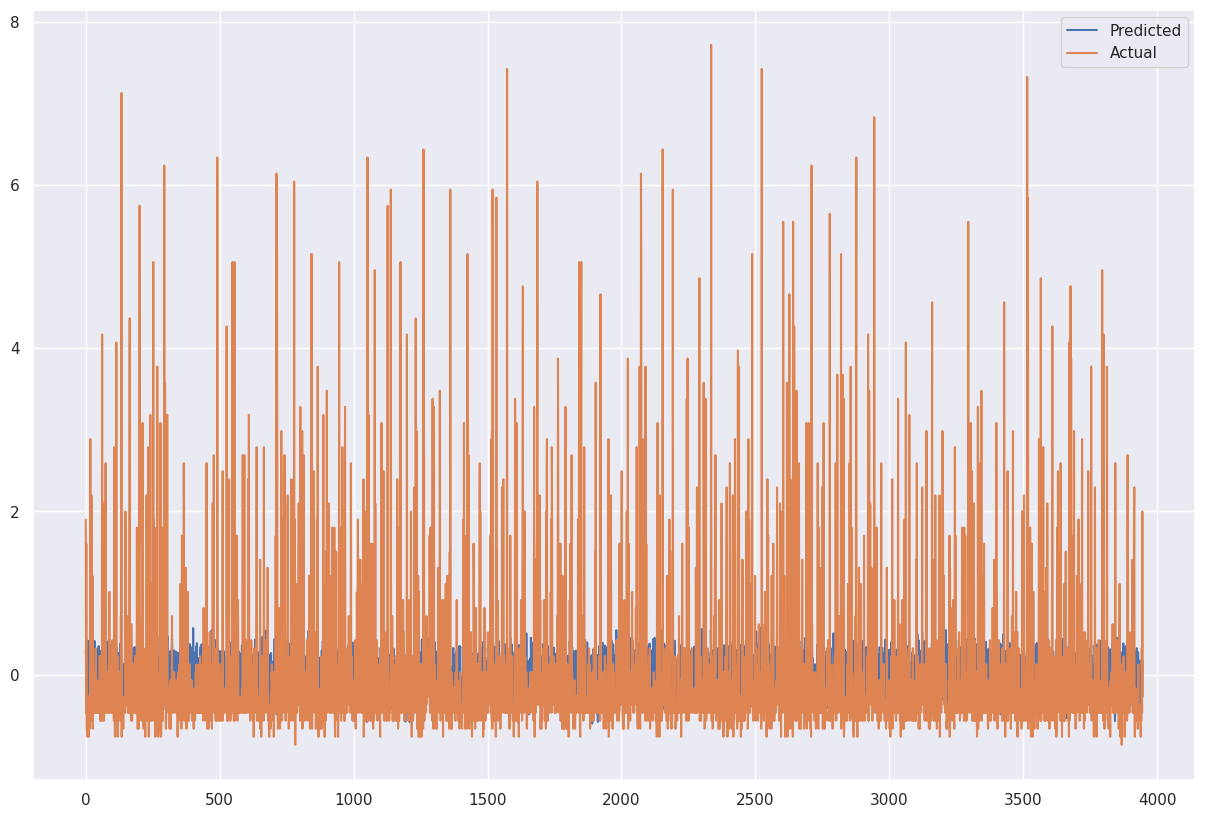

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Fitting All the models

In [ ]:
# List of models that we are going to use for this dataset
model=[
    ["LinearRegression: ",LinearRegression()],
    ["Lasso : ",Lasso()],
    ["Ridge : ",Ridge()],
    ["ElasticNet : ",ElasticNet()],
    ["DecisionTree: ",DecisionTreeRegressor()],
    ["RandomforestRegressor : ",RandomForestRegressor()],
    ["Gradientboosting : ",GradientBoostingRegressor()],
]

In [ ]:
# Run all the proposed models and update the information in a list model_data
model_list=[]
for name,fit_model in model:
  fit_model_list={}
  fit_model.random_state=100
  fit_model_list["Name"]=name
  fit_model.fit(X_train,y_train)
  fit_model_list["Train_r2_score"]=r2_score(y_train,fit_model.predict(X_train))
  fit_model_list["Test_r2_score"]=r2_score(y_test,fit_model.predict(X_test))
  fit_model_list["Train_MSE_score"]=mean_squared_error(y_train,fit_model.predict(X_train))
  fit_model_list["Test_MSE_score"]=mean_squared_error(y_test,fit_model.predict(X_test))
  fit_model_list["Train_RMSE_score"]=np.sqrt(mean_squared_error(y_train,fit_model.predict(X_train)))
  fit_model_list["Test_RMSE_score"]=np.sqrt(mean_squared_error(y_test,fit_model.predict(X_test)))
  model_list.append(fit_model_list)

In [ ]:
model_list

[{'Name': 'LinearRegression: ',
  'Train_r2_score': 0.06387699074963138,
  'Test_r2_score': 0.058171955223783156,
  'Train_MSE_score': 0.9361230092503686,
  'Test_MSE_score': 1.0427350880449096,
  'Train_RMSE_score': 0.9675345002894566,
  'Test_RMSE_score': 1.0211440094545479},
 {'Name': 'Lasso : ',
  'Train_r2_score': 0.0,
  'Test_r2_score': -0.00037059887598722696,
  'Train_MSE_score': 1.0,
  'Test_MSE_score': 1.1075498656916107,
  'Train_RMSE_score': 1.0,
  'Test_RMSE_score': 1.0524019506308466},
 {'Name': 'Ridge : ',
  'Train_r2_score': 0.06387698771798278,
  'Test_r2_score': 0.05817293032884008,
  'Train_MSE_score': 0.9361230122820172,
  'Test_MSE_score': 1.042734008467525,
  'Train_RMSE_score': 0.9675345018561443,
  'Test_RMSE_score': 1.0211434808426898},
 {'Name': 'ElasticNet : ',
  'Train_r2_score': 0.0,
  'Test_r2_score': -0.00037059887598722696,
  'Train_MSE_score': 1.0,
  'Test_MSE_score': 1.1075498656916107,
  'Train_RMSE_score': 1.0,
  'Test_RMSE_score': 1.0524019506308466

In [ ]:
# Convert list to dataframe
dataframe=pd.DataFrame(model_list)

In [ ]:
model_dataframe=dataframe.sort_values(by="Train_r2_score",ascending=False)

In [ ]:
model_dataframe

Name  Train_r2_score  Test_r2_score  Train_MSE_score  \
4            DecisionTree:         1.000000       0.286427     4.063988e-34   
5  RandomforestRegressor :         0.941369       0.565458     5.863053e-02   
6       Gradientboosting :         0.283830       0.224162     7.161700e-01   
0        LinearRegression:         0.063877       0.058172     9.361230e-01   
2                  Ridge :         0.063877       0.058173     9.361230e-01   
1                  Lasso :         0.000000      -0.000371     1.000000e+00   
3             ElasticNet :         0.000000      -0.000371     1.000000e+00   

   Test_MSE_score  Train_RMSE_score  Test_RMSE_score  
4        0.790025      2.015933e-17         0.888833  
5        0.481098      2.421374e-01         0.693612  
6        0.858960      8.462683e-01         0.926801  
0        1.042735      9.675345e-01         1.021144  
2        1.042734      9.675345e-01         1.021143  
1        1.107550      1.000000e+00         1.052402  
3        1.107550      1.000000e+00         1.052402

<Axes: title={'center': 'Results'}, xlabel='Name'>

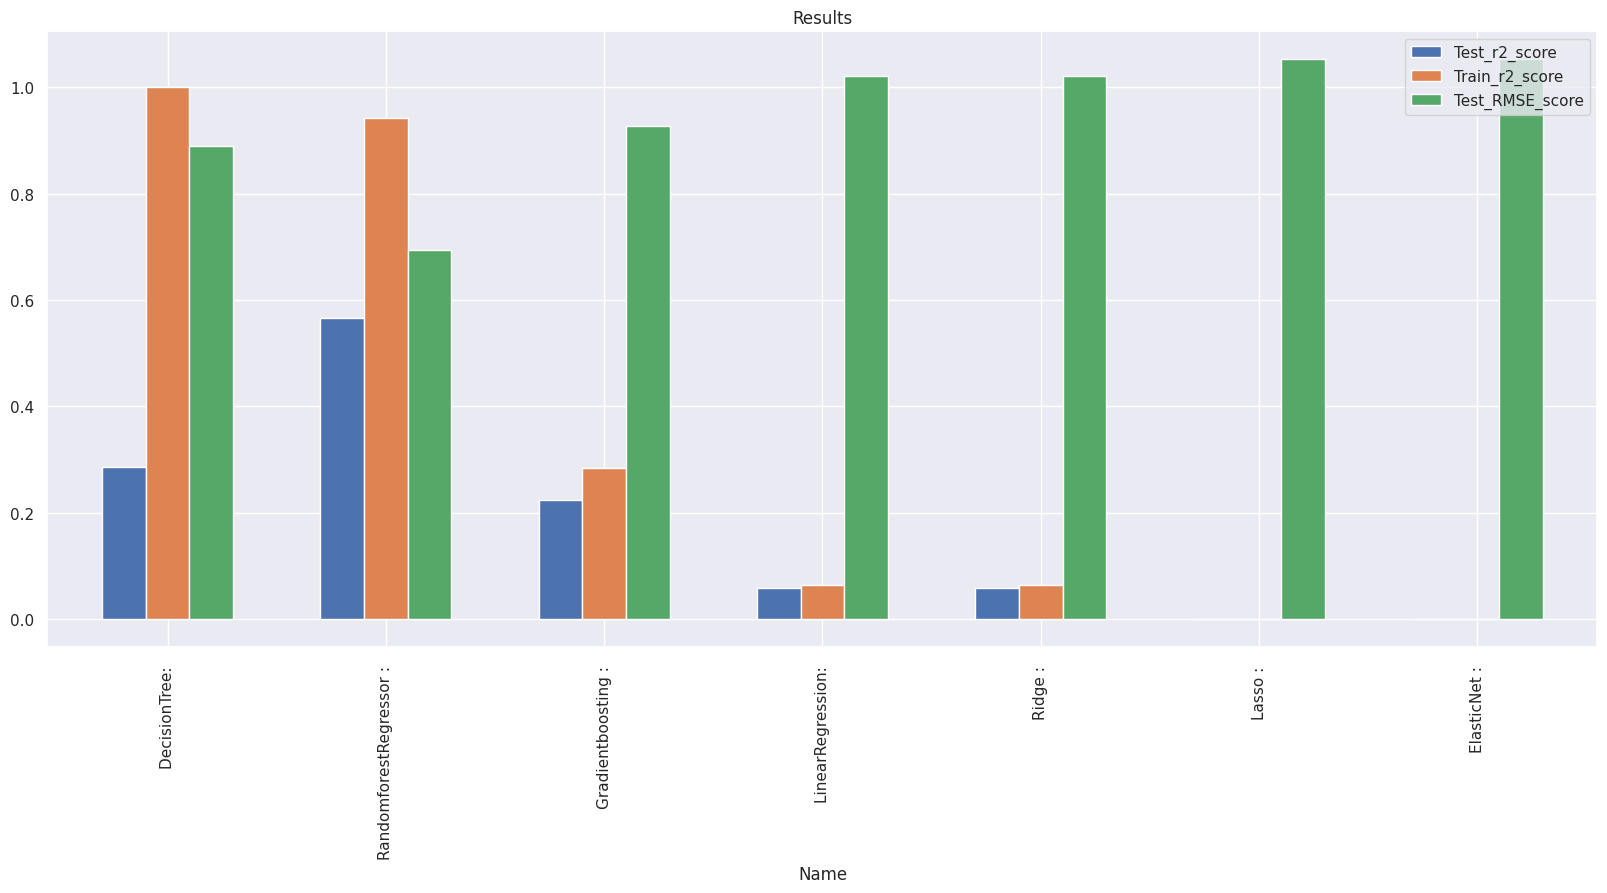

In [ ]:
model_dataframe.plot.bar(x="Name", y=['Test_r2_score' , 'Train_r2_score' , 'Test_RMSE_score'], title = 'Results' , width = .6, figsize= (20,8))

So, Random Forest Regressor has least RMSE error has decent r2 score

## Hyperparameter tuning

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

# Using GridSearchCV


GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

# Hyper Parameter Tuning Using GridSearchCV

In [ ]:
#Tuning the hyperparameters of Random forest using GridSearchCV
rf=RandomForestRegressor(random_state=40)
# HYperparameter Grid
parameters=[{'n_estimators' :[10, 20, 30, 40, 50, 60, 70,80],
             'max_depth'  :[100,150,200,250],
             'max_features' :["sqrt", "log2", "auto"]
             }]
# Instantiate the grid search model
rf_grid_search=GridSearchCV(estimator=rf,param_grid=parameters,scoring="r2",n_jobs =-1,cv=5,verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [100, 150, 200, 250],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]}],
             scoring='r2', verbose=2)

In [ ]:
rf_grid_search.best_params_

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 80}

In [ ]:
rf_grid_search.best_estimator_

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=80,
                      random_state=40)

In [ ]:
y_pred_train=rf_grid_search.best_estimator_.score(X_train,y_train)

In [ ]:
y_pred_train

0.942694638785856

In [ ]:
y_pred_test=rf_grid_search.best_estimator_.score(X_test,y_test)

In [ ]:
y_pred_test

0.5683433219816846

In [ ]:
Mse_test=(mean_squared_error(y_test,rf_grid_search.best_estimator_.predict(X_test)))
Mse_test

0.4779041850102777

In [ ]:
np.sqrt(mean_squared_error(y_test,rf_grid_search.best_estimator_.predict(X_test)))

0.691306144201162

In [ ]:
Mse_train=(mean_squared_error(y_train,rf_grid_search.best_estimator_.predict(X_train)))
Mse_train

0.057305361214143986

In [ ]:
np.sqrt(mean_squared_error(y_train,rf_grid_search.best_estimator_.predict(X_train)))

0.2393853822064831

In [ ]:
#making a list of specific model score
model_=[['Tuned Random Forest',0.94269,0.568343,0.0573053,0.4779041,0.2393853,0.6913061]]

In [ ]:
#creating Dataframe
Tunedrf=pd.DataFrame(model_,columns=["Name","Train_r2_score","Test_r2_score","Train_MSE_score","Test_MSE_score","Train_RMSE_score","Test_RMSE_score"])
Tunedrf

Name  Train_r2_score  Test_r2_score  Train_MSE_score  \
0  Tuned Random Forest         0.94269       0.568343         0.057305   

   Test_MSE_score  Train_RMSE_score  Test_RMSE_score  
0        0.477904          0.239385         0.691306

In [ ]:
#appending list into original Dataframe
all_model = model_dataframe.append(Tunedrf).set_index("Name").sort_values(by="Train_r2_score",ascending=False)
all_model

Train_r2_score  Test_r2_score  Train_MSE_score  \
Name                                                                       
DecisionTree:                   1.000000       0.286427     4.063988e-34   
Tuned Random Forest             0.942690       0.568343     5.730530e-02   
RandomforestRegressor :         0.941369       0.565458     5.863053e-02   
Gradientboosting :              0.283830       0.224162     7.161700e-01   
LinearRegression:               0.063877       0.058172     9.361230e-01   
Ridge :                         0.063877       0.058173     9.361230e-01   
Lasso :                         0.000000      -0.000371     1.000000e+00   
ElasticNet :                    0.000000      -0.000371     1.000000e+00   

                          Test_MSE_score  Train_RMSE_score  Test_RMSE_score  
Name                                                                         
DecisionTree:                   0.790025      2.015933e-17         0.888833  
Tuned Random Forest             0.477904      2.393853e-01         0.691306  
RandomforestRegressor :         0.481098      2.421374e-01         0.693612  
Gradientboosting :              0.858960      8.462683e-01         0.926801  
LinearRegression:               1.042735      9.675345e-01         1.021144  
Ridge :                         1.042734      9.675345e-01         1.021143  
Lasso :                         1.107550      1.000000e+00         1.052402  
ElasticNet :                    1.107550      1.000000e+00         1.052402

Text(0.5, 1.0, 'R2 Score')

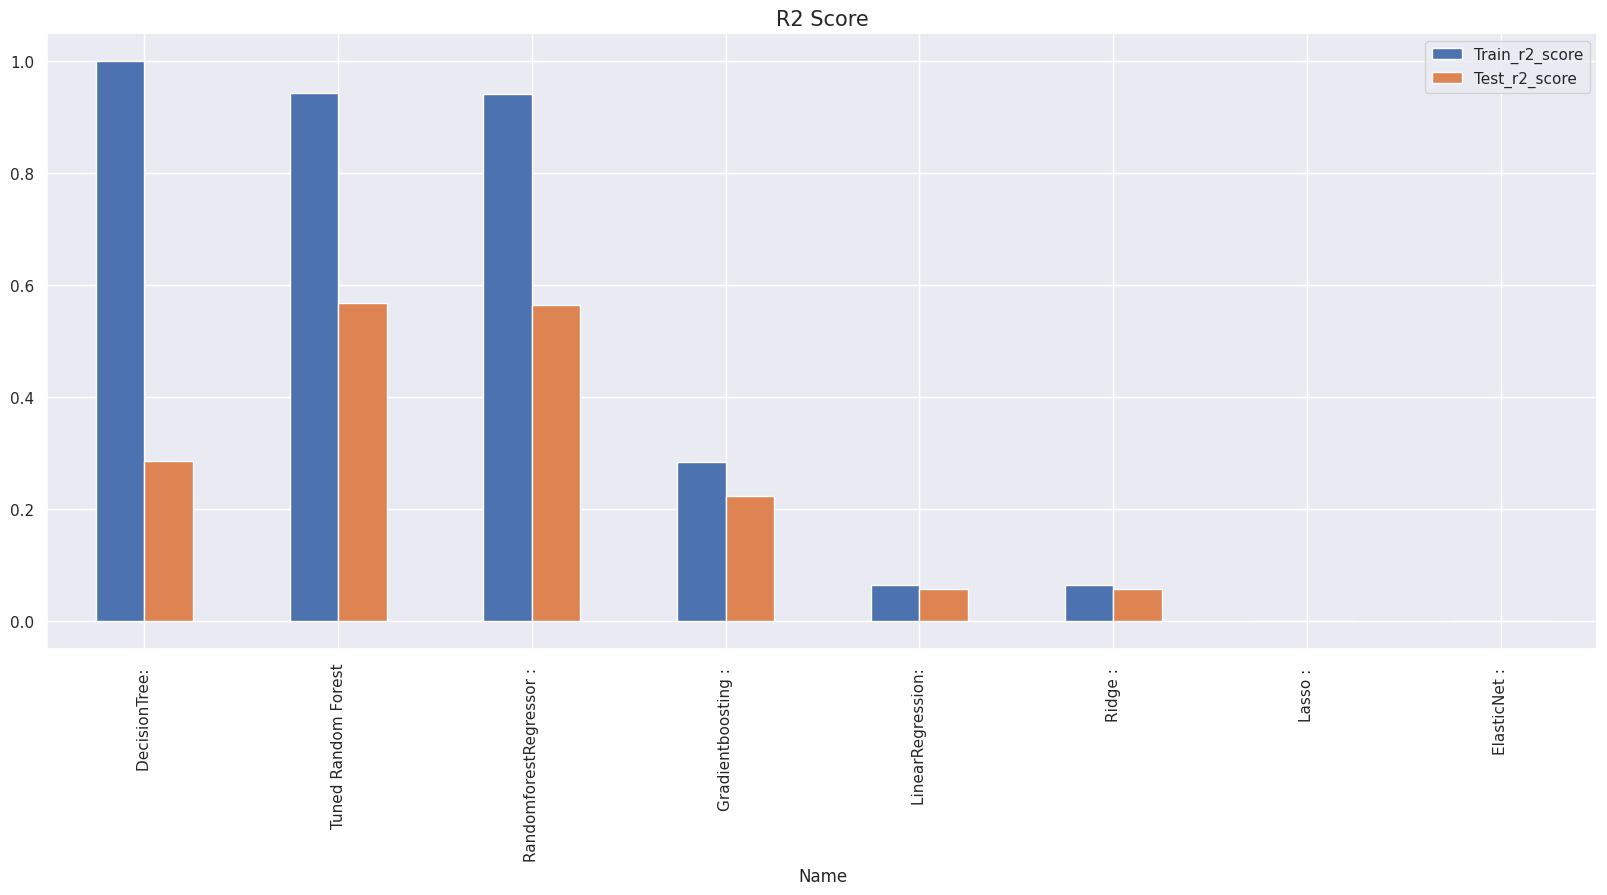

In [ ]:
#Bar plot of all the model scores
all_model.plot(y=["Train_r2_score","Test_r2_score"], kind="bar", figsize=(20,8))
plt.title("R2 Score",size=15)

## Conclusion



###*   The Dataset does not contains null values ,but there is very less correlation between features and target variables.
###*   Dropped some irrelevent features like rv1,rv2 which has infinite VIF. also removed features like visibility that has very less correlartion with target variable.
###*     By fitting all the model get best score in Random Forest regressor , after tuting the hyper parameter using GridsearchCV, GET Train r2 score 0.94 and test r2 score 0.5622 because of improper dataset and less correlation between feature and target variable.
###*   The performance is low due to like:- no proper pattern of data, less correlation , not enough relevent features.









# Model explainability

For knowing which are the features is important for predicting we are using Model explainability.

In [ ]:
sns.set_style('darkgrid')

In [ ]:
X.columns

Index(['T_out', 'Press_mm_hg', 'RH_6', 'Windspeed', 'Visibility', 'Tdewpoint',
       'months', 'hour', 'Mean_house_temp', 'Mean_relative_humidity'],
      dtype='object')

In [ ]:
X_train1=pd.DataFrame(X_train)
X_test1=pd.DataFrame(X_test)

In [ ]:
X_test1.columns=[['T_out', 'Press_mm_hg', 'RH_6',
       'Windspeed', 'Visibility', 'Tdewpoint', 'months', 'hour',
       'Mean_house_temp', 'Mean_relative_humidity']]

In [ ]:
X_train1.columns=[['T_out', 'Press_mm_hg', 'RH_6',
       'Windspeed', 'Visibility', 'Tdewpoint', 'months', 'hour',
       'Mean_house_temp', 'Mean_relative_humidity']]

In [ ]:
#rf regressor
rf=RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)

# fit the regressor with x and y data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)

In [ ]:
# Define a tree explainer for the built model
rf_model=rf
explainer = shap.TreeExplainer(rf)

In [ ]:
# Obtain a Scatter Summary Plot
#explainer_train = shap.TreeExplainer(rf_model)
shap_values_train = explainer.shap_values(X_train1)

After calculating the SHAP values we ploted several analyses that will help us understand the model.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
explainer_train = shap.TreeExplainer(rf_model)
# obtain shap values for the first row of the test data
shap.force_plot(explainer.expected_value[0], shap_values_train[0], X_train1.iloc[0])

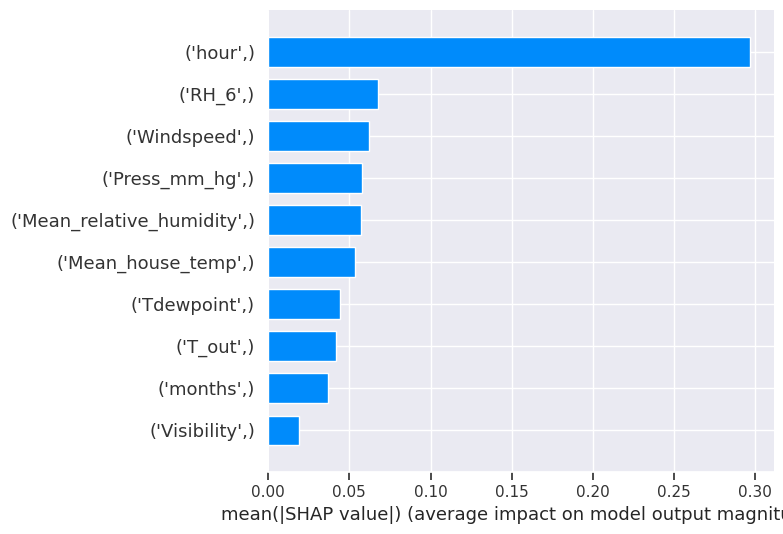

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="bar")

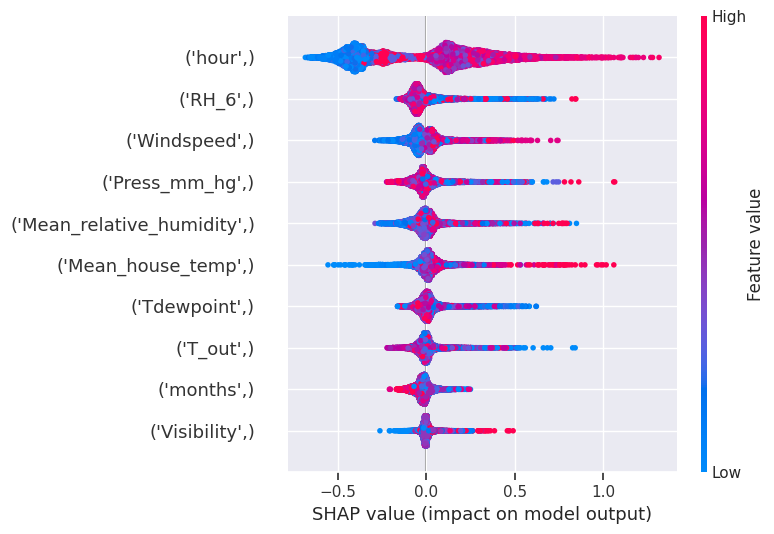

In [ ]:
# Obtain a dot Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="dot")

This plot gives us the explainability of a single model prediction. Force plot can be used for error analysis, finding the explanation to specific instance prediction.

From the plot we can see:

*  The model output value: -0.52
*  The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset
*  The numbers on the plot arrows are the value of the feature for this instance.
*  Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
*  The bigger the arrow, the bigger the impact of the feature on the output.
*  The amount of decrease or increase in the impact can be seen on the x-axis.
